# Telecom Churn Case study

In [1]:
#importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
%matplotlib inline
import time
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)

In [2]:
df= pd.read_csv(r"C:\UPGRAD CSV\Telecom Churn\telecom_churn_data.csv")

In [3]:
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [4]:
df.shape

(99999, 226)

In [5]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

In [6]:
dict_df = pd.read_excel(r"C:\UPGRAD CSV\Telecom Churn\Data+Dictionary-+Telecom+Churn+Case+Study.xlsx")

In [7]:
dict_df

,Acronyms,Descriptions
0,MOBILE_NUMBER,Customer phone number
1,CIRCLE_ID,Telecom circle area to which the customer belongs to
2,LOC,Local calls - within same telecom circle
3,STD,STD calls - outside the calling circle
4,IC,Incoming calls
5,OG,Outgoing calls
6,T2T,"Operator T to T, i.e. within same operator (mobile to mobile)"
7,T2M,Operator T to other operator mobile
8,T2O,Operator T to other operator fixed line
9,T2F,Operator T to fixed lines of T


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mobile_number,99999.0,7.001207e+09,695669.386290,7.000000e+09,7.000606e+09,7.001205e+09,7.001812e+09,7.002411e+09
circle_id,99999.0,1.090000e+02,0.000000,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02
loc_og_t2o_mou,98981.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
std_og_t2o_mou,98981.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
loc_ic_t2o_mou,98981.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
arpu_6,99999.0,2.829874e+02,328.439770,-2.258709e+03,9.341150e+01,1.977040e+02,3.710600e+02,2.773109e+04
arpu_7,99999.0,2.785366e+02,338.156291,-2.014045e+03,8.698050e+01,1.916400e+02,3.653445e+02,3.514583e+04
arpu_8,99999.0,2.791547e+02,344.474791,-9.458080e+02,8.412600e+01,1.920800e+02,3.693705e+02,3.354362e+04
arpu_9,99999.0,2.616451e+02,341.998630,-1.899505e+03,6.268500e+01,1.768490e+02,3.534665e+02,3.880562e+04
onnet_mou_6,96062.0,1.323959e+02,297.207406,0.000000e+00,7.380000e+00,3.431000e+01,1.187400e+02,7.376710e+03


In [9]:
#lets check the columns unique values and drop with values as 1 

unique_1_col = []
for i in df.columns:
    if df[i].nunique() == 1:
        unique_1_col.append(i)
    else:
        pass
df.drop(unique_1_col, axis=1, inplace=True)
print("\n The following columns are dropped from the dataset as their unique value is 1. (i.e)it has no variance in the model\n",
     unique_1_col)


 The following columns are dropped from the dataset as their unique value is 1. (i.e)it has no variance in the model
 ['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9']


In [10]:
df.shape

(99999, 210)

In [11]:
round(100*(df.isnull().sum()/df.shape[0]), 2).sort_values(ascending=False)

max_rech_data_6             74.85
fb_user_6                   74.85
count_rech_3g_6             74.85
count_rech_2g_6             74.85
night_pck_user_6            74.85
arpu_3g_6                   74.85
total_rech_data_6           74.85
av_rech_amt_data_6          74.85
arpu_2g_6                   74.85
date_of_last_rech_data_6    74.85
arpu_3g_7                   74.43
night_pck_user_7            74.43
total_rech_data_7           74.43
date_of_last_rech_data_7    74.43
av_rech_amt_data_7          74.43
max_rech_data_7             74.43
fb_user_7                   74.43
count_rech_3g_7             74.43
arpu_2g_7                   74.43
count_rech_2g_7             74.43
count_rech_3g_9             74.08
date_of_last_rech_data_9    74.08
count_rech_2g_9             74.08
fb_user_9                   74.08
total_rech_data_9           74.08
max_rech_data_9             74.08
night_pck_user_9            74.08
arpu_2g_9                   74.08
av_rech_amt_data_9          74.08
arpu_3g_9     

In [12]:
# selecting all the columns with datetime format
date_col= df.select_dtypes(include=['object'])
print("\nThese are the columns available with datetime format represented as object\n",date_col.columns)

# Converting the selected columns to datetime format
for i in date_col.columns:
    df[i] = pd.to_datetime(df[i])

# Current dimension of the dataset
df.shape


These are the columns available with datetime format represented as object
 Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9'],
      dtype='object')


(99999, 210)

In [13]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 210 columns):
 #    Column                    Dtype         
---   ------                    -----         
 0    mobile_number             int64         
 1    arpu_6                    float64       
 2    arpu_7                    float64       
 3    arpu_8                    float64       
 4    arpu_9                    float64       
 5    onnet_mou_6               float64       
 6    onnet_mou_7               float64       
 7    onnet_mou_8               float64       
 8    onnet_mou_9               float64       
 9    offnet_mou_6              float64       
 10   offnet_mou_7              float64       
 11   offnet_mou_8              float64       
 12   offnet_mou_9              float64       
 13   roam_ic_mou_6             float64       
 14   roam_ic_mou_7             float64       
 15   roam_ic_mou_8             float64       
 16   roam_ic_mou_9             float64     

# Handling missing values 

In [14]:
#Handling missing values with respect to data recharge

df[['date_of_last_rech_data_6', 'total_rech_data_6','max_rech_data_6']].head(10)

,date_of_last_rech_data_6,total_rech_data_6,max_rech_data_6
0,2014-06-21,1.0,252.0
1,NaT,NaN,NaN
2,NaT,NaN,NaN
3,NaT,NaN,NaN
4,2014-06-04,1.0,56.0
5,NaT,NaN,NaN
6,NaT,NaN,NaN
7,NaT,NaN,NaN
8,NaT,NaN,NaN
9,NaT,NaN,NaN


## Handling missing values for the attributes 'total_rech_data_6'*'max_rech_data_6' and for month 6,7,8,9

In [15]:
# Code for conditional imputation
start_time=time.time()
for i in range(len(df)):
  # Handling 'total_rech_data', 'max_rech_data' and for month 6
    if pd.isnull((df['total_rech_data_6'][i]) and (df['max_rech_data_6'][i])):
        if pd.isnull(df['date_of_last_rech_data_6'][i]):
            df['total_rech_data_6'][i]=0
            df['max_rech_data_6'][i]=0

            
  # Handling 'total_rech_data', 'max_rech_data' and for month 7
    if pd.isnull((df['total_rech_data_7'][i]) and (df['max_rech_data_7'][i])):
        if pd.isnull(df['date_of_last_rech_data_7'][i]):
            df['total_rech_data_7'][i]=0
            df['max_rech_data_7'][i]=0

  # Handling 'total_rech_data', 'max_rech_data' and for month 8
    if pd.isnull((df['total_rech_data_8'][i]) and (df['max_rech_data_8'][i])):
        if pd.isnull(df['date_of_last_rech_data_8'][i]):
            df['total_rech_data_8'][i]=0
            df['max_rech_data_8'][i]=0

  # Handling 'total_rech_data', 'max_rech_data' and for month 9
    if pd.isnull((df['total_rech_data_9'][i]) and (df['max_rech_data_9'][i])):
        if pd.isnull(df['date_of_last_rech_data_9'][i]):
            df['total_rech_data_9'][i]=0
            df['max_rech_data_9'][i]=0

end_time = time.time()
print("\nExecution Time = ", round(end_time-start_time,2),"seconds")
print("The columns \n'total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9'\n'max_rech_data_6','max_rech_data_7','max_rech_data_8','max_rech_data_9' are imputed with 0 based on the condition explained above")


Execution Time =  279.32 seconds
The columns 
'total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9'
'max_rech_data_6','max_rech_data_7','max_rech_data_8','max_rech_data_9' are imputed with 0 based on the condition explained above


## Handling the missing values for the attributes Handling the missing values for the attributes count_rech_2g_*,count_rech_3g_* for month 6,7,8 and 9

In [16]:
#Checking the related columns 

df[['count_rech_2g_6', 'count_rech_3g_6', 'total_rech_data_6']].head(10)

,count_rech_2g_6,count_rech_3g_6,total_rech_data_6
0,0.0,1.0,1.0
1,NaN,NaN,0.0
2,NaN,NaN,0.0
3,NaN,NaN,0.0
4,1.0,0.0,1.0
5,NaN,NaN,0.0
6,NaN,NaN,0.0
7,NaN,NaN,0.0
8,NaN,NaN,0.0
9,NaN,NaN,0.0


##From the above tablular the column values of total_rech_data for each month from 6 to 9 respectively is the sum of the columns 
values of count_rech_2g for each month from 6 to 9 respectively and count_rech_3g for each month from 6 to 9 respectively, 
which derives to a multicollinearity issue. In order to reduce the multicollinearity, we can drop the columns count_rech_2g for 
each month from 6 to 9 respectively and count_rech_3g for each month from 6 to 9 respectively.

In [17]:
#Dropping the columns 'count_rech_2g_*' * 'count_rech_3g_*' for the months 6,7,8,9

df.drop(['count_rech_2g_6', 'count_rech_3g_6',
        'count_rech_2g_7', 'count_rech_3g_7',
        'count_rech_2g_8', 'count_rech_3g_8',
        'count_rech_2g_9', 'count_rech_3g_9'], axis=1, inplace =True)

print("the columns 'count_rech_2g_6', 'count_rech_3g_6', 'count_rech_2g_7', 'count_rech_3g_7','count_rech_2g_8', 'count_rech_3g_8', 'count_rech_2g_9', 'count_rech_3g_9' are deopped")

the columns 'count_rech_2g_6', 'count_rech_3g_6', 'count_rech_2g_7', 'count_rech_3g_7','count_rech_2g_8', 'count_rech_3g_8', 'count_rech_2g_9', 'count_rech_3g_9' are deopped


In [18]:
df.shape

(99999, 202)

In [19]:
#Handling missing values for arpu_3g_*, arpu_2g_*, for the month of 6,7,8,9

df[['arpu_3g_6', 'arpu_2g_6', 'av_rech_amt_data_6']].head(10)

,arpu_3g_6,arpu_2g_6,av_rech_amt_data_6
0,212.17,212.17,252.0
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,0.00,0.00,56.0
5,NaN,NaN,NaN
6,NaN,NaN,NaN
7,NaN,NaN,NaN
8,NaN,NaN,NaN
9,NaN,NaN,NaN


In [20]:
#Checking correlation between for the above mentioned columns 

print("corr for the month of 6\n\n", df[['arpu_3g_6', 'arpu_2g_6', 'av_rech_amt_data_6']].corr())
print("corr for the month of 7\n\n", df[['arpu_3g_7', 'arpu_2g_7', 'av_rech_amt_data_7']].corr())
print("corr for the month of 8\n\n", df[['arpu_3g_8', 'arpu_2g_8', 'av_rech_amt_data_8']].corr())
print("corr for the month of 9\n\n", df[['arpu_3g_9', 'arpu_2g_9', 'av_rech_amt_data_9']].corr())

corr for the month of 6

                     arpu_3g_6  arpu_2g_6  av_rech_amt_data_6
arpu_3g_6           1.000000   0.932232   0.809695          
arpu_2g_6           0.932232   1.000000   0.834065          
av_rech_amt_data_6  0.809695   0.834065   1.000000          
corr for the month of 7

                     arpu_3g_7  arpu_2g_7  av_rech_amt_data_7
arpu_3g_7           1.000000   0.930366   0.796131          
arpu_2g_7           0.930366   1.000000   0.815933          
av_rech_amt_data_7  0.796131   0.815933   1.000000          
corr for the month of 8

                     arpu_3g_8  arpu_2g_8  av_rech_amt_data_8
arpu_3g_8           1.000000   0.924925   0.787165          
arpu_2g_8           0.924925   1.000000   0.805482          
av_rech_amt_data_8  0.787165   0.805482   1.000000          
corr for the month of 9

                     arpu_3g_9  arpu_2g_9  av_rech_amt_data_9
arpu_3g_9           1.000000   0.852253   0.722932          
arpu_2g_9           0.852253   1.000000   

In [21]:
#Dropping the columns 

df.drop(['arpu_3g_6', 'arpu_2g_6',
        'arpu_3g_7', 'arpu_2g_7',
        'arpu_3g_8', 'arpu_2g_8',
        'arpu_3g_9', 'arpu_2g_9'], axis=1, inplace=True)

print("\nThe columns'arpu_3g_6','arpu_2g_6','arpu_3g_7','arpu_2g_7','arpu_3g_8','arpu_2g_8','arpu_3g_9','arpu_2g_9' are dropped from the dataset due to high corellation between their respective arpu_* variable in the dataset\n")


The columns'arpu_3g_6','arpu_2g_6','arpu_3g_7','arpu_2g_7','arpu_3g_8','arpu_2g_8','arpu_3g_9','arpu_2g_9' are dropped from the dataset due to high corellation between their respective arpu_* variable in the dataset



In [22]:
df.shape

(99999, 194)

# Handling the other missing values fb_user and night_pck_user

In [23]:
df.drop(['fb_user_6','fb_user_7','fb_user_8', 'fb_user_9',
        'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'night_pck_user_9'], axis=1, inplace=True)

print("the columns are dropped 'fb_user_6','fb_user_7','fb_user_8', 'fb_user_9','night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'night_pck_user_9' ")

the columns are dropped 'fb_user_6','fb_user_7','fb_user_8', 'fb_user_9','night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'night_pck_user_9' 


In [24]:
df.shape

(99999, 186)

In [25]:
#handling the missing values av_rech_amt_data for the month 6,7,8,9

df[['av_rech_amt_data_7', 'max_rech_data_7', 'total_rech_data_7']].head(10)

,av_rech_amt_data_7,max_rech_data_7,total_rech_data_7
0,252.0,252.0,1.0
1,154.0,154.0,1.0
2,NaN,0.0,0.0
3,NaN,0.0,0.0
4,NaN,0.0,0.0
5,NaN,0.0,0.0
6,NaN,0.0,0.0
7,NaN,0.0,0.0
8,177.0,154.0,2.0
9,154.0,154.0,1.0


In [26]:
#code for the conditional input 

start_time = time.time()
for i in range(len(df)):
    #handling av_rech_amt_data for month 6 
    if(pd.isnull(df['av_rech_amt_data_6'][i]) and (df['total_rech_data_6'][i]==0)):
        df['av_rech_amt_data_6'][i]=0
        
    #handling av_rech_amt_data for month 7 
    if(pd.isnull(df['av_rech_amt_data_7'][i]) and (df['total_rech_data_7'][i]==0)):
        df['av_rech_amt_data_7'][i]=0
        
    #handling av_rech_amt_data for month 8 
    if(pd.isnull(df['av_rech_amt_data_8'][i]) and (df['total_rech_data_8'][i]==0)):
        df['av_rech_amt_data_8'][i]=0
        
    #handling av_rech_amt_data for month 9 
    if(pd.isnull(df['av_rech_amt_data_9'][i]) and (df['total_rech_data_9'][i]==0)):
        df['av_rech_amt_data_9'][i]=0
        
end_time = time.time()
print("\nExecution Time = ", round(end_time-start_time,2),"seconds")
print("\nThe columns 'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8' and 'av_rech_amt_data_9' are imputed with 0 based on the condition explained above\n")


Execution Time =  109.99 seconds

The columns 'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8' and 'av_rech_amt_data_9' are imputed with 0 based on the condition explained above



In [27]:
((df.isnull().sum()/df.shape[0])*100).round(2).sort_values(ascending=False)

date_of_last_rech_data_6    74.85
date_of_last_rech_data_7    74.43
date_of_last_rech_data_9    74.08
date_of_last_rech_data_8    73.66
og_others_9                 7.75 
loc_og_t2f_mou_9            7.75 
loc_og_t2t_mou_9            7.75 
loc_ic_t2f_mou_9            7.75 
std_ic_mou_9                7.75 
std_og_t2f_mou_9            7.75 
loc_og_t2m_mou_9            7.75 
loc_ic_mou_9                7.75 
std_og_t2m_mou_9            7.75 
std_ic_t2f_mou_9            7.75 
std_ic_t2t_mou_9            7.75 
loc_og_t2c_mou_9            7.75 
std_ic_t2m_mou_9            7.75 
std_og_t2t_mou_9            7.75 
loc_og_mou_9                7.75 
std_og_mou_9                7.75 
spl_ic_mou_9                7.75 
roam_og_mou_9               7.75 
spl_og_mou_9                7.75 
loc_ic_t2t_mou_9            7.75 
isd_og_mou_9                7.75 
roam_ic_mou_9               7.75 
loc_ic_t2m_mou_9            7.75 
isd_ic_mou_9                7.75 
onnet_mou_9                 7.75 
ic_others_9   

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 186 entries, mobile_number to sep_vbc_3g
dtypes: datetime64[ns](8), float64(144), int64(34)
memory usage: 141.9 MB


In [29]:
#Dropping the columns related to datetime 

df.drop(['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9'], axis=1, inplace=True)

In [30]:
#As we can no more utilise the datetime column, we can drop the date_of_last_rech_data_ column corresponding to months 6,7,8 
#and 9 respectively
df.drop(["date_of_last_rech_6", "date_of_last_rech_7", "date_of_last_rech_8", "date_of_last_rech_9"], axis=1, inplace=True)

print("\nThe columns 'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9' are dropped as it has no significance to the data\n")


The columns 'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9' are dropped as it has no significance to the data



In [31]:
df.shape

(99999, 178)

# Flitering the high value customers from good phase 

In [32]:
# Filtering the data 
 # We are filtering the data in accordance to total revenue generated per customer.

 # first we need the total amount recharge amount done for data alone, we have average rechage amount done. 

 # Calculating the total recharge amount done for data alone in months 6,7,8 and 9
df['total_rech_amt_data_6']=df['av_rech_amt_data_6'] * df['total_rech_data_6']
df['total_rech_amt_data_7']=df['av_rech_amt_data_7'] * df['total_rech_data_7']

# Calculating the overall recharge amount for the months 6,7,8 and 9
df['overall_rech_amt_6'] = df['total_rech_amt_data_6'] + df['total_rech_amt_6']
df['overall_rech_amt_7'] = df['total_rech_amt_data_7'] + df['total_rech_amt_7']

# Calculating the average recharge done by customer in months June and July(i.e. 6th and 7th month)
df['avg_rech_amt_6_7'] = (df['overall_rech_amt_6'] + df['overall_rech_amt_7'])/2

# Finding the value of 70th percentage in the overall revenues defining the high value customer creteria for the company
cut_off = df['avg_rech_amt_6_7'].quantile(0.70)
print("\nThe 70th quantile value to determine the High Value Customer is: ",cut_off,"\n")

# Filtering the data to the top 30% considered as High Value Customer
df = df[df['avg_rech_amt_6_7'] >= cut_off]


The 70th quantile value to determine the High Value Customer is:  478.0 



In [33]:
df.shape

(30001, 183)

In [34]:
#lets again check the missing value percentage for HVC group

((df.isnull().sum() /df.shape[0])*100).round(2).sort_values(ascending =False)

loc_ic_t2f_mou_9         6.34
spl_og_mou_9             6.34
loc_og_t2m_mou_9         6.34
loc_og_t2f_mou_9         6.34
loc_ic_t2t_mou_9         6.34
isd_og_mou_9             6.34
loc_og_t2t_mou_9         6.34
loc_ic_t2m_mou_9         6.34
std_og_t2t_mou_9         6.34
roam_og_mou_9            6.34
std_og_mou_9             6.34
loc_ic_mou_9             6.34
std_ic_t2t_mou_9         6.34
roam_ic_mou_9            6.34
loc_og_t2c_mou_9         6.34
std_ic_t2m_mou_9         6.34
offnet_mou_9             6.34
std_ic_t2f_mou_9         6.34
std_og_t2f_mou_9         6.34
std_ic_mou_9             6.34
onnet_mou_9              6.34
spl_ic_mou_9             6.34
loc_og_mou_9             6.34
isd_ic_mou_9             6.34
std_og_t2m_mou_9         6.34
ic_others_9              6.34
og_others_9              6.34
std_og_mou_8             3.91
isd_og_mou_8             3.91
std_og_t2f_mou_8         3.91
std_ic_t2t_mou_8         3.91
og_others_8              3.91
loc_ic_t2t_mou_8         3.91
loc_ic_t2m

# Numerical columns available

In [35]:
num_col = df.select_dtypes(include = ['int64', 'float64']).columns.tolist() 

In [36]:
#importing libraries for scaling and imputation

from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df[num_col]=scaler.fit_transform(df[num_col])

#KNN imputer 
knn = KNNImputer(n_neighbors=3)

df_knn = pd.DataFrame(knn.fit_transform(df[num_col]))
df_knn.columns = df[num_col].columns

In [37]:
df_knn.isnull().sum().sum()

0

### The KNN Imputer has replaced all the null values in the numerical column usingK-means algorithm sucessfully

In [38]:
# Since we sclaed the numerical columns for the purpose of handling the null values, 
#we can restore the sclaed alues to its original form.

#Converting scaled data backto the original data 
df[num_col] = scaler.inverse_transform(df_knn)

df.head(10)

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,overall_rech_amt_6,overall_rech_amt_7,avg_rech_amt_6_7
0,7.000843e+09,197.385,214.816,213.803,21.100,53.27,24.613333,0.00,33.590000,84.23,23.993333,0.00,27.833333,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.000000,53.27,24.613333,0.00,33.206667,79.27,18.196667,0.00,24.193333,0.403333,4.813333,0.00,2.69,0.353333,0.0,0.00,0.243333,132.953333,47.636667,0.00,60.096667,0.00,0.00,0.00,0.383333,0.41,0.976667,0.00,0.943333,0.00,0.00,0.00,0.00,0.41,0.976667,0.00,1.326667,0.00,0.00,0.00,0.000000,4.14,0.326667,0.00,0.663333,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,44.493333,13.396667,0.16,32.263333,69.183333,62.85,4.13,38.553333,17.74,22.503333,1.15,11.360000,131.433333,98.76,5.44,82.186667,0.00,3.366667,0.00,0.000000,0.583333,0.37,0.00,1.456667,1.243333,1.113333,0.00,1.656667,1.826667,4.853333,0.00,3.116667,0.00,0.00,5.44,0.00,0.043333,0.0,0.0,0.093333,0.00,0.00,0.00,0.00,0.00,0.55,0.00,0.203333,4.0,3.0,2.0,6.0,362.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,968.0,30.40,0.00,101.20,3.58,252.0,252.0,614.0,504.0,559.0
7,7.000702e+09,1069.180,1349.850,3171.480,500.000,57.84,54.680000,52.29,65.276667,453.43,567.160000,325.91,172.050000,16.23,33.49,31.64,4.776667,23.74,12.

In [39]:
#Checking the overall missing values in the dataset 

((df.isnull().sum()/df.shape[0])*100).round(2).sort_values(ascending=False)

mobile_number            0.0
isd_ic_mou_8             0.0
ic_others_6              0.0
ic_others_7              0.0
ic_others_8              0.0
ic_others_9              0.0
total_rech_num_6         0.0
total_rech_num_7         0.0
total_rech_num_8         0.0
total_rech_num_9         0.0
total_rech_amt_6         0.0
total_rech_amt_7         0.0
total_rech_amt_8         0.0
total_rech_amt_9         0.0
max_rech_amt_6           0.0
max_rech_amt_7           0.0
max_rech_amt_8           0.0
max_rech_amt_9           0.0
last_day_rch_amt_6       0.0
last_day_rch_amt_7       0.0
last_day_rch_amt_8       0.0
isd_ic_mou_9             0.0
isd_ic_mou_7             0.0
total_rech_data_6        0.0
isd_ic_mou_6             0.0
std_ic_t2m_mou_7         0.0
std_ic_t2m_mou_8         0.0
std_ic_t2m_mou_9         0.0
std_ic_t2f_mou_6         0.0
std_ic_t2f_mou_7         0.0
std_ic_t2f_mou_8         0.0
std_ic_t2f_mou_9         0.0
std_ic_mou_6             0.0
std_ic_mou_7             0.0
std_ic_mou_8  

In [40]:
df.isnull().sum().sum()

0

# Defining Churn variable

#### Now tag the churned customers (churn=0, else 1) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase.

### As explained above in the introduction, we are deriving based on usage based for this model.

#### For that, we need to find the derive churn variable using total_ic_mou_9, total_og_mou_9, vol_2g_mb_9 and vol_3g_mb_9 attributes

In [41]:
churn_col = ['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']
df[churn_col].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total_ic_mou_9  30001 non-null  float64
 1   total_og_mou_9  30001 non-null  float64
 2   vol_2g_mb_9     30001 non-null  float64
 3   vol_3g_mb_9     30001 non-null  float64
dtypes: float64(4)
memory usage: 1.1 MB


In [42]:
df['churn']=0

df['churn'] =np.where(df[churn_col].sum(axis=1) == 0, 1, 0)

In [43]:
df.head(10)

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,overall_rech_amt_6,overall_rech_amt_7,avg_rech_amt_6_7,churn
0,7.000843e+09,197.385,214.816,213.803,21.100,53.27,24.613333,0.00,33.590000,84.23,23.993333,0.00,27.833333,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.000000,53.27,24.613333,0.00,33.206667,79.27,18.196667,0.00,24.193333,0.403333,4.813333,0.00,2.69,0.353333,0.0,0.00,0.243333,132.953333,47.636667,0.00,60.096667,0.00,0.00,0.00,0.383333,0.41,0.976667,0.00,0.943333,0.00,0.00,0.00,0.00,0.41,0.976667,0.00,1.326667,0.00,0.00,0.00,0.000000,4.14,0.326667,0.00,0.663333,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,44.493333,13.396667,0.16,32.263333,69.183333,62.85,4.13,38.553333,17.74,22.503333,1.15,11.360000,131.433333,98.76,5.44,82.186667,0.00,3.366667,0.00,0.000000,0.583333,0.37,0.00,1.456667,1.243333,1.113333,0.00,1.656667,1.826667,4.853333,0.00,3.116667,0.00,0.00,5.44,0.00,0.043333,0.0,0.0,0.093333,0.00,0.00,0.00,0.00,0.00,0.55,0.00,0.203333,4.0,3.0,2.0,6.0,362.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,968.0,30.40,0.00,101.20,3.58,252.0,252.0,614.0,504.0,559.0,1
7,7.000702e+09,1069.180,1349.850,3171.480,500.000,57.84,54.680000,52.29,65.276667,453.43,567.160000,325.91,172.050000,16.23,33.49,31.64,4.776667,2

0    91.863605
1    8.136395 
Name: churn, dtype: float64


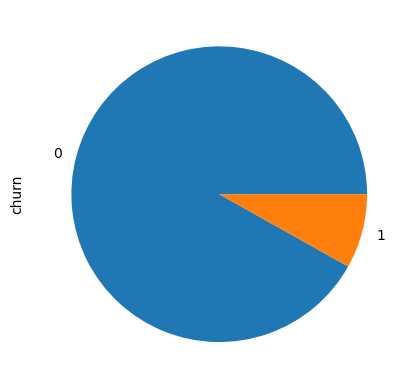

In [44]:
#lets find churn / non churn percentage

print((df['churn'].value_counts()/len(df))*100)
((df['churn'].value_counts()/len(df))*100).plot(kind="pie")
plt.show()

## As we can see that 92% of the customers do not churn, there is a possibility of class imbalance

### Since this variable churn is the target variable, all the columns relating to this variable(i.e. all columns with suffix _9) can be dropped forn the dataset.

In [45]:
#Selecting the churn phase columns in order to drop them 

churn_phase_cols = [col for col in df.columns if '_9' in col]
print("the columns from churn phase are:", churn_phase_cols)

the columns from churn phase are: ['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'total_rech_data_9', 'max_rech_data_9', 'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9']


In [46]:
#Dropping the churn phase columns

df.drop(churn_phase_cols, axis=1, inplace=True)

df.shape

(30001, 141)

### We can still clean the data by few possible columns relating to the good phase.
### As we derived few columns in the good phase earlier, we can drop those related columns during creation.

In [47]:
df.drop(['total_rech_amt_data_6','av_rech_amt_data_6',
                   'total_rech_data_6','total_rech_amt_6',
                  'total_rech_amt_data_7','av_rech_amt_data_7',
                   'total_rech_data_7','total_rech_amt_7'], axis=1, inplace=True)

### We can also create new columns for the defining the good phase variables and drop the seperate 6th and 7 month variables.

#### Before proceding to check the remaining missing value handling, let us check the collineartity of the indepedent variables and try to understand their dependencies.

In [48]:
#create a list of column names for each month 

mon_6_cols = [col for col in df.columns if '_6' in col]
mon_7_cols = [col for col in df.columns if '_7' in col]
mon_8_cols = [col for col in df.columns if '_8' in col]

In [49]:
#Lets check the correlation amongest the independent variables, drop highly corelated ones

df_corr = df.corr()
df_corr.loc[:,:] = np.tril(df_corr, k=-1)
df_corr = df_corr.stack()
df_corr

df_corr[(df_corr > 0.80) | (df_corr < -0.80)].sort_values(ascending=False)

total_rech_amt_8    arpu_8                0.955351
isd_og_mou_8        isd_og_mou_7          0.943433
                    isd_og_mou_6          0.919641
isd_og_mou_7        isd_og_mou_6          0.916237
sachet_2g_8         total_rech_data_8     0.900629
total_ic_mou_6      loc_ic_mou_6          0.895099
total_ic_mou_8      loc_ic_mou_8          0.893072
total_ic_mou_7      loc_ic_mou_7          0.883070
std_og_t2t_mou_8    onnet_mou_8           0.860483
std_og_t2t_mou_7    onnet_mou_7           0.860275
std_og_t2t_mou_6    onnet_mou_6           0.859593
avg_rech_amt_6_7    overall_rech_amt_7    0.856275
std_og_t2m_mou_7    offnet_mou_7          0.854685
std_og_t2m_mou_8    offnet_mou_8          0.851049
total_og_mou_8      std_og_mou_8          0.848858
total_og_mou_7      std_og_mou_7          0.848825
loc_ic_mou_8        loc_ic_t2m_mou_8      0.847512
std_ic_mou_8        std_ic_t2m_mou_8      0.845590
loc_ic_mou_6        loc_ic_t2m_mou_6      0.844418
loc_og_mou_8        loc_og_mou_

In [50]:
col_to_drop=['total_rech_amt_8','isd_og_mou_8','isd_og_mou_7','sachet_2g_8','total_ic_mou_6',
            'total_ic_mou_8','total_ic_mou_7','std_og_t2t_mou_6','std_og_t2t_mou_8','std_og_t2t_mou_7',
            'std_og_t2m_mou_7','std_og_t2m_mou_8',]

# These columns can be dropped as they are highly collinered with other predictor variables.
# criteria set is for collinearity of 85%

#  dropping these column
df.drop(col_to_drop, axis=1, inplace=True)

In [51]:
df.shape

(30001, 121)

# Deriving new variables to understand data

In [52]:
#we have a column called 'aon'

## we can derive new variables from this to explain the data w.r.t churn.

#creating a new variable 'tenure'
df['tenure'] = (df['aon']/30).round(0)

#since we have derived a new column from 'aon' we can drop it 
df.drop('aon', axis=1, inplace =True )

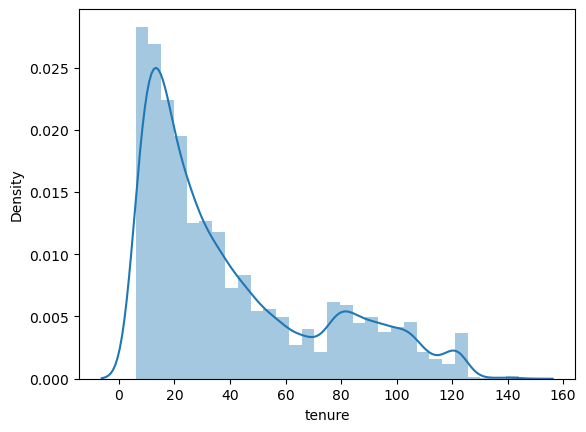

In [53]:
#Checking distribution

sns.distplot(df['tenure'], bins=30)
plt.show()

In [54]:
tn_range = [0, 6, 12, 24, 60, 61]
tn_label = ['0-6 months', '6-12 months', '1-2 year', '2-5 years', '5 years and above']
df['tenure_range'] = pd.cut(df['tenure'], tn_range, labels = tn_label)
df['tenure_range'].head()

0     2-5 years  
7     2-5 years  
8     6-12 months
21    1-2 year   
23    1-2 year   
Name: tenure_range, dtype: category
Categories (5, object): ['0-6 months' < '6-12 months' < '1-2 year' < '2-5 years' < '5 years and above']

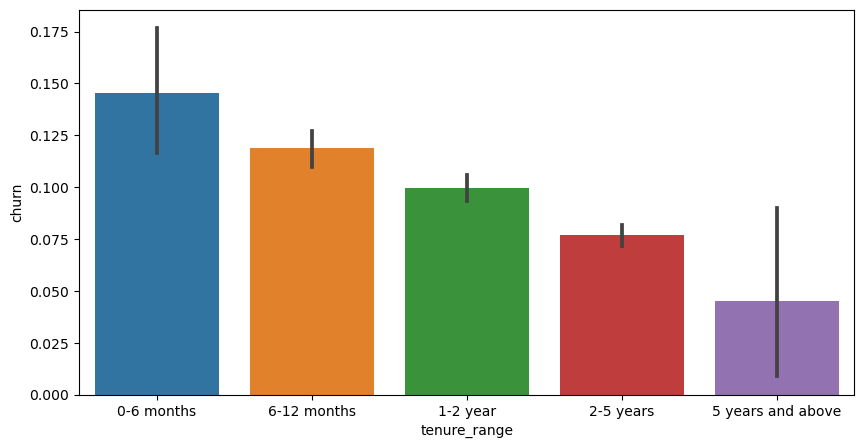

In [55]:
#plotting bar plot for tenure range 

plt.figure(figsize=(10,5))
sns.barplot(x='tenure_range', y='churn', data=df)
plt.show()

## It can be seen that the maximum churn rate happens within 0-6 month, but it gradually decreases as the customer retains in the network.

#### The average revenue per user is good phase of customer is given by arpu_6 and arpu_7. since we have two seperate averages, lets take an average to these two and drop the other columns

In [56]:
df["avg_arpu_6_7"] = (df['arpu_6'] + df['arpu_7'])/2
df["avg_arpu_6_7"].head()

0     206.1005 
7     1209.5150
8     435.4720 
21    556.1030 
23    134.1235 
Name: avg_arpu_6_7, dtype: float64

In [57]:
#lets drop the original columns as they are derived to a new column for better understanding 
df.drop(['arpu_6', 'arpu_7'], axis=1, inplace=True)

df.shape

(30001, 121)

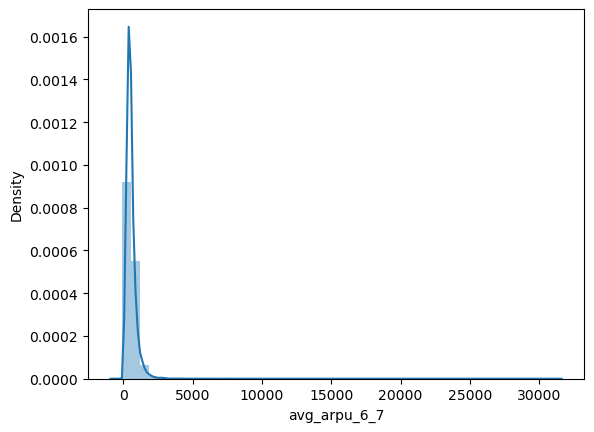

In [58]:
#visualizing the created column 

sns.distplot(df["avg_arpu_6_7"])
plt.show()

Text(0.5, 1.0, 'Features correlating with churn variable')

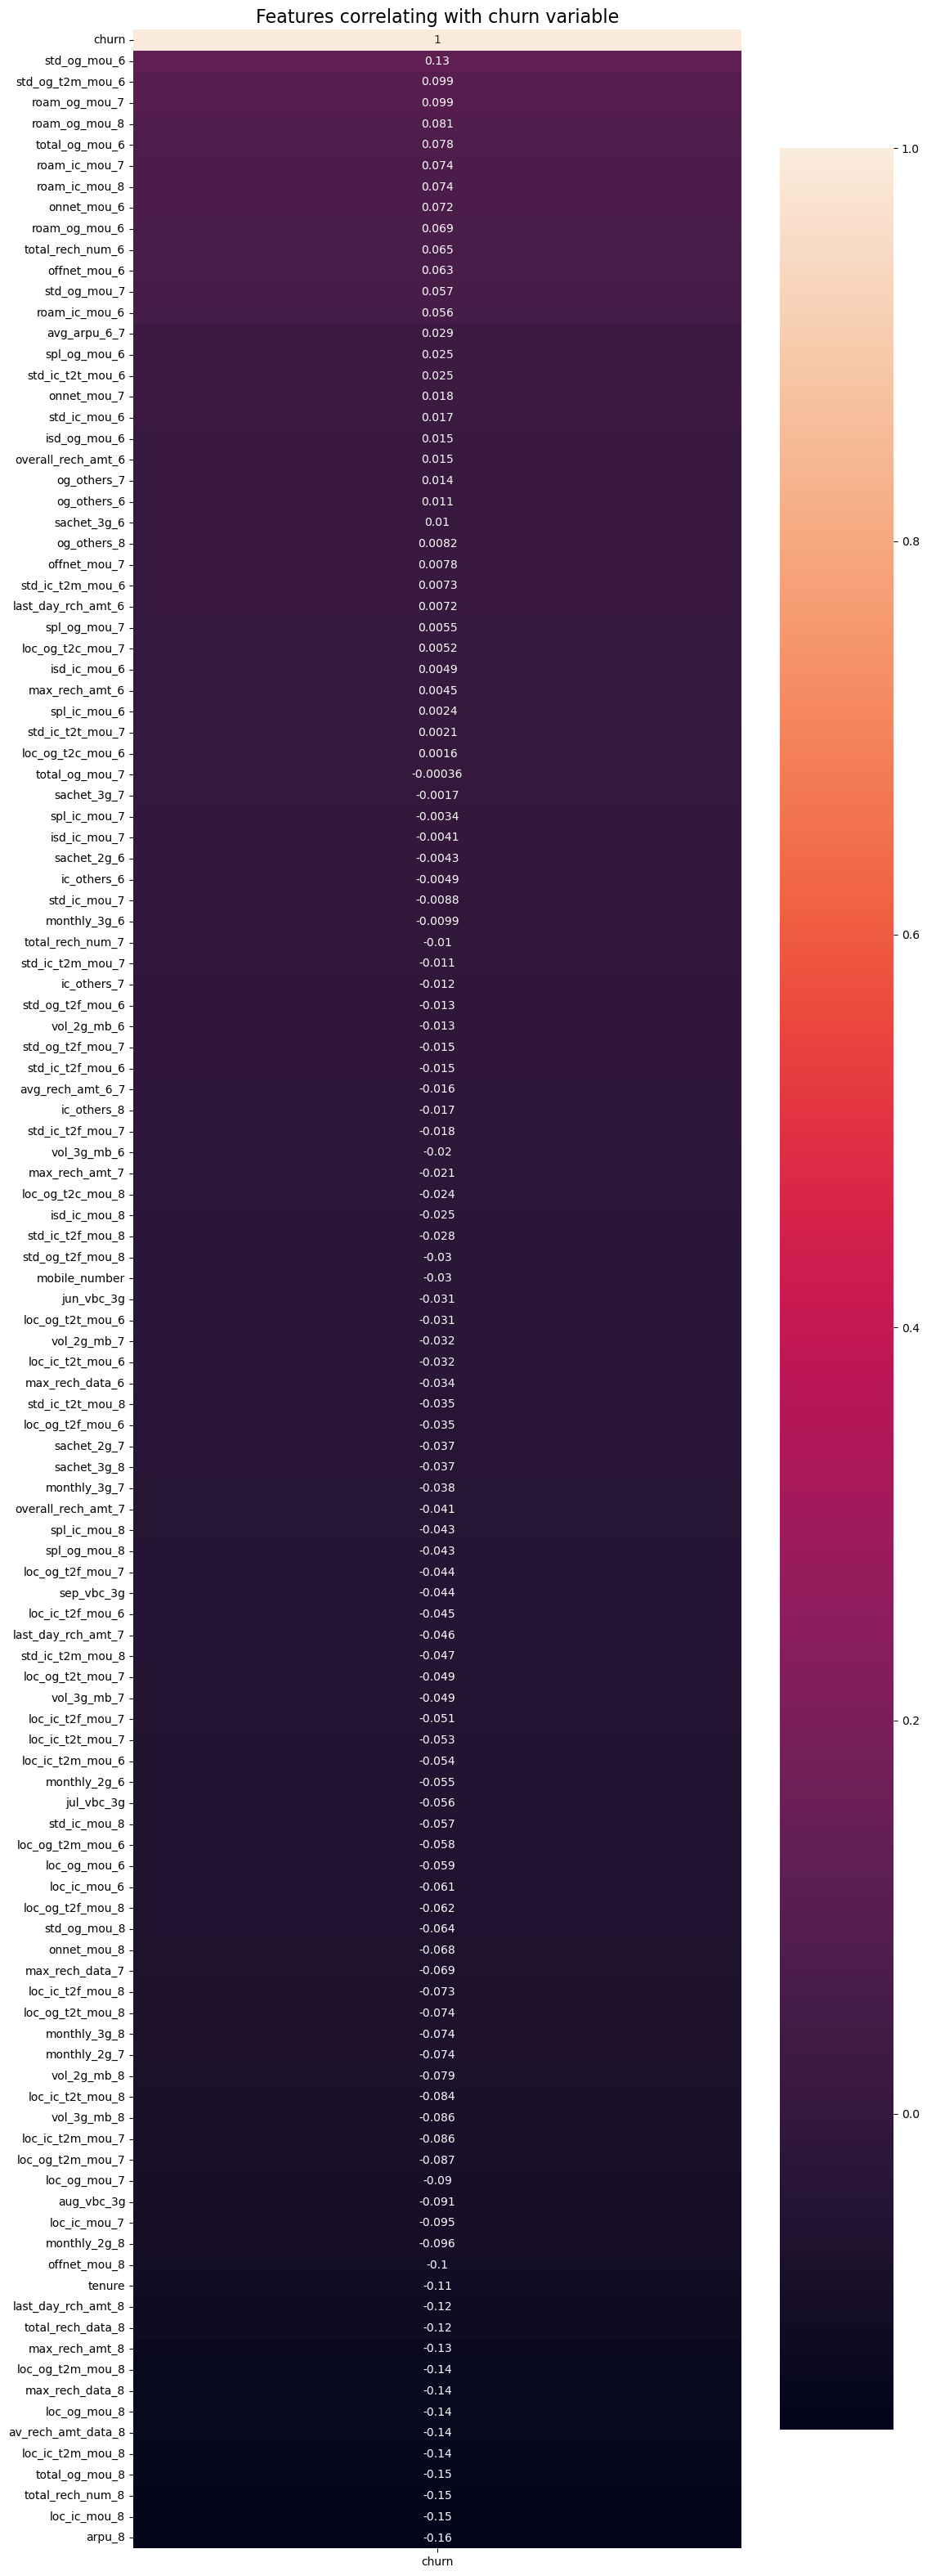

In [59]:
#Checking the correlation between target variables (Sales price) and other variables 

plt.figure(figsize=(12, 40))
heatmap_churn = sns.heatmap(df.corr()[['churn']].sort_values(ascending=False, by='churn'),annot=True)
heatmap_churn.set_title("Features correlating with churn variable", fontsize = 16)

#### Avg Outgoing Calls & calls on romaning for 6 & 7th months are positively correlated with churn.
#### Avg Revenue, No. Of Recharge for 8th month has negative correlation with churn.

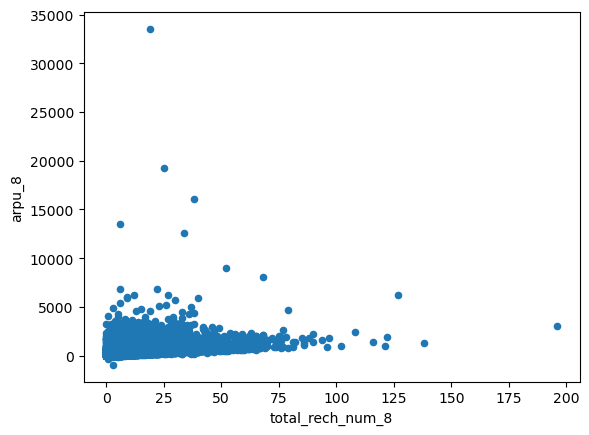

In [60]:
#lets plot scatter plot between total recharge and avg revenue 

df[['total_rech_num_8', 'arpu_8']].plot.scatter(x='total_rech_num_8', y='arpu_8')
plt.show()

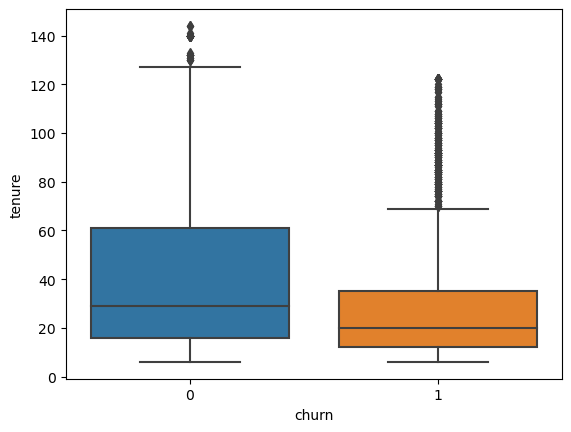

In [61]:
sns.boxplot(x = df.churn, y=df.tenure)
plt.show()

### From the above plot , its clear tenured customers do no churn and they keep availing telecom services

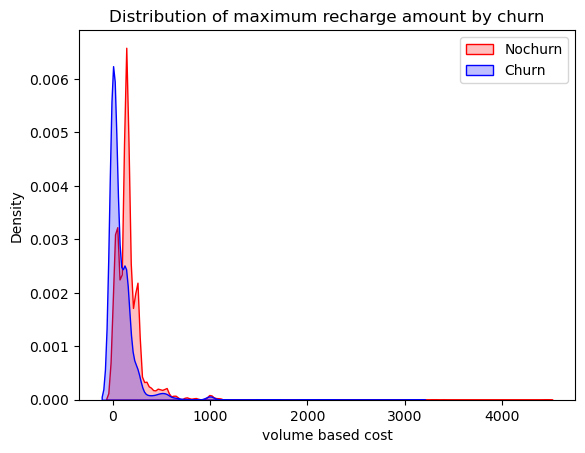

In [62]:
#plot between churn and max rech amount
ax = sns.kdeplot(df.max_rech_amt_8[(df["churn"] ==0)],color= "red", shade=True)
ax = sns.kdeplot(df.max_rech_amt_8[(df["churn"] ==1)], ax=ax, color="blue", shade=True)
ax.legend(["Nochurn", "Churn"], loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('volume based cost')
ax.set_title('Distribution of maximum recharge amount by churn')
plt.show()

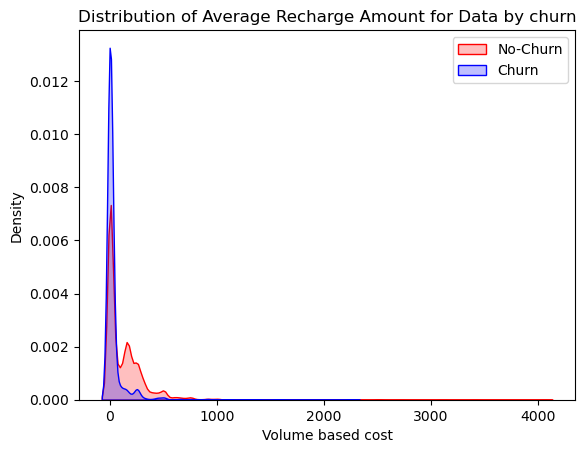

In [63]:
# churn vs max rechare amount
ax = sns.kdeplot(df.av_rech_amt_data_8[(df["churn"] == 0)],
                color="Red", shade = True)
ax = sns.kdeplot(df.av_rech_amt_data_8[(df["churn"] == 1)],
                ax =ax, color="Blue", shade= True)
ax.legend(["No-Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Volume based cost')
ax.set_title('Distribution of Average Recharge Amount for Data by churn')
plt.show()

In [64]:
#Creating the category for month 8 column total recharge and and their count 

df['total_rech_data_group_8']= pd.cut(df['total_rech_data_8'], [-1, 0,10,25,100], labels=["No_Recharge", "<=10_Recharges", "10-25_Recharges", ">25_Recharges"])
df['total_rech_num_group_8']= pd.cut(df['total_rech_num_8'], [-1, 0,10,25,1000], labels=["No_Recharge", "<=10_Recharges", "10-25_Recharges", ">25_Recharges"])

<=10_Recharges     15307
No_Recharge        14048
10-25_Recharges    608  
>25_Recharges      38   
Name: total_rech_data_group_8, dtype: int64


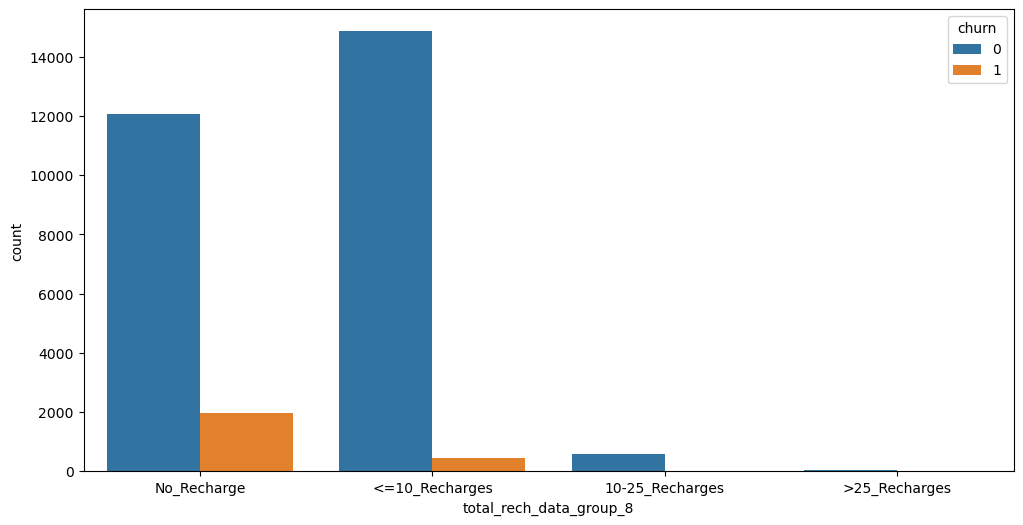

<=10_Recharges     15307
No_Recharge        14048
10-25_Recharges    608  
>25_Recharges      38   
Name: total_rech_data_group_8, dtype: int64


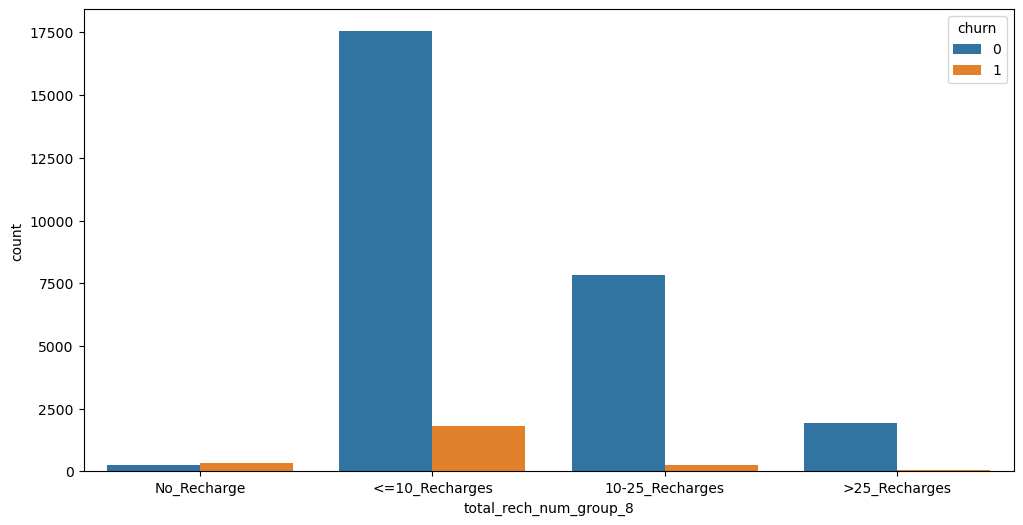

In [65]:
#plotting the results
plt.figure(figsize=(12,6))
sns.countplot(data =df, x='total_rech_data_group_8', hue="churn")
print(df['total_rech_data_group_8'].value_counts())
plt.show()

plt.figure(figsize=(12,6))
sns.countplot(data =df, x='total_rech_num_group_8', hue="churn")
print(df['total_rech_data_group_8'].value_counts())
plt.show()

## As the number of recharge rate increases, the churn rate decreases clearly.

In [66]:
#Creating a dummy variables for some of the categorical variable and dropping the firsdt one 

dummy = pd.get_dummies(df[['total_rech_data_group_8', 'total_rech_num_group_8', 'tenure_range']], drop_first=True)
dummy.head()

,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,tenure_range_6-12 months,tenure_range_1-2 year,tenure_range_2-5 years,tenure_range_5 years and above
0,1,0,0,1,0,0,0,0,1,0
7,0,0,0,1,0,0,0,0,1,0
8,1,0,0,0,1,0,1,0,0,0
21,0,0,0,0,0,1,0,1,0,0
23,1,0,0,1,0,0,0,1,0,0


In [67]:
#Adding the results for master dataframe

df=pd.concat([df, dummy], axis=1)
df.head()

,mobile_number,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,overall_rech_amt_6,overall_rech_amt_7,avg_rech_amt_6_7,churn,tenure,tenure_range,avg_arpu_6_7,total_rech_data_group_8,total_rech_num_group_8,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,tenure_range_6-12 months,tenure_range_1-2 year,tenure_range_2-5 years,tenure_range_5 years and above
0,7.000843e+09,213.803,53.27,24.613333,0.00,84.23,23.993333,0.00,0.00,0.00,0.00,0.00,0.00,0.00,53.27,24.613333,0.00,79.27,18.196667,0.00,0.403333,4.813333,0.00,0.353333,0.0,0.00,132.953333,47.636667,0.00,0.41,0.00,0.00,0.00,0.41,0.976667,0.00,0.0,4.14,0.326667,0.00,0.0,0.0,0.0,0.00,0.00,0.00,44.493333,13.396667,0.16,69.183333,62.85,4.13,17.74,22.503333,1.15,131.433333,98.76,5.44,0.00,3.366667,0.00,0.583333,0.37,0.00,1.243333,1.113333,0.00,1.826667,4.853333,0.00,0.043333,0.0,0.0,0.00,0.00,0.00,0.00,0.55,0.00,4.0,3.0,2.0,252.0,252.0,252.0,252.0,252.0,252.0,1.0,252.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,30.40,0.00,101.20,3.58,614.0,504.0,559.0,1,32.0,2-5 years,206.1005,<=10_Recharges,<=10_Recharges,1,0,0,1,0,0,0,0,1,0
7,7.000702e+09,3171.480,57.84,54.680000,52.29,453.43,567.160000,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.380000,40.28,308.63,447.380000,162.28,62.130000,55.140000,53.23,0.000000,0.0,0.00,422.160000,533.910000,255.79,49.89,6.66,20.08,16.68,60.86,75.140000,77.84,0.0,4.50,0.000000,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.140000,32.260000,27.31,217.560000,221.49,121.19,152.16,101.460000,39.53,427.880000,355.23,188.04,36.89,11.830000,30.39,91.440000,126.99,141.33,52.190000,34.240000,22.21,180.540000,173.080000,193.94,0.210000,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5.0,5.0,7.0,1580.0,790.0,1580.0,0.0,0.0,779.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57.74,19.38,18.74,0.00,1580.0,790.0,1185.0,1,27.0,2-5 years,1209.5150,No_Recharge,<=10_Recharges,0,0,0,1,0,0,0,0,1,0
8,7.001525e+09,137.362,413.69,351.030000,35.08,94.66,80.630000,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.590000,12.49,80.96,70.580000,50.54,0.000000,0.000000,0.00,0.000000,0.0,7.15,378.090000,288.180000,63.04,13.69,0.00,0.00,0.00,130.26,143.48

In [68]:
#Create the copy of the filter data frames 

df=df[:].copy()

#Dropping unwanted columns 
df.drop(['tenure_range', 'mobile_number', 'total_rech_data_group_8', 'total_rech_num_group_8', 'sep_vbc_3g', 'tenure'], axis=1, inplace=True)

In [69]:
df.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,overall_rech_amt_6,overall_rech_amt_7,avg_rech_amt_6_7,churn,avg_arpu_6_7,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,tenure_range_6-12 months,tenure_range_1-2 year,tenure_range_2-5 years,tenure_range_5 years and above
0,213.803,53.27,24.613333,0.00,84.23,23.993333,0.00,0.00,0.00,0.00,0.00,0.00,0.00,53.27,24.613333,0.00,79.27,18.196667,0.00,0.403333,4.813333,0.00,0.353333,0.0,0.00,132.953333,47.636667,0.00,0.41,0.00,0.00,0.00,0.41,0.976667,0.00,0.0,4.14,0.326667,0.00,0.0,0.0,0.0,0.00,0.00,0.00,44.493333,13.396667,0.16,69.183333,62.85,4.13,17.74,22.503333,1.15,131.433333,98.76,5.44,0.00,3.366667,0.00,0.583333,0.37,0.00,1.243333,1.113333,0.00,1.826667,4.853333,0.00,0.043333,0.0,0.0,0.00,0.00,0.00,0.00,0.55,0.00,4.0,3.0,2.0,252.0,252.0,252.0,252.0,252.0,252.0,1.0,252.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,30.40,0.00,101.20,614.0,504.0,559.0,1,206.1005,1,0,0,1,0,0,0,0,1,0
7,3171.480,57.84,54.680000,52.29,453.43,567.160000,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.380000,40.28,308.63,447.380000,162.28,62.130000,55.140000,53.23,0.000000,0.0,0.00,422.160000,533.910000,255.79,49.89,6.66,20.08,16.68,60.86,75.140000,77.84,0.0,4.50,0.000000,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.140000,32.260000,27.31,217.560000,221.49,121.19,152.16,101.460000,39.53,427.880000,355.23,188.04,36.89,11.830000,30.39,91.440000,126.99,141.33,52.190000,34.240000,22.21,180.540000,173.080000,193.94,0.210000,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5.0,5.0,7.0,1580.0,790.0,1580.0,0.0,0.0,779.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57.74,19.38,18.74,1580.0,790.0,1185.0,1,1209.5150,0,0,0,1,0,0,0,0,1,0
8,137.362,413.69,351.030000,35.08,94.66,80.630000,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.590000,12.49,80.96,70.580000,50.54,0.000000,0.000000,0.00,0.000000,0.0,7.15,378.090000,288.180000,63.04,13.69,0.00,0.00,0.00,130.26,143.480000,98.28,0.0,0.00,0.000000,10.23,0.0,0.0,0.0,508.36,431.66,171.56,23.840000,9.840000,0.31,57.580000,13.98,15.48,0.00,0.000000,0.00,81.430000,23.83,15.79,0.00,0.580000,0.10,22.430000,4.08,0.65,0.000000,0.000000,0.00,22.430000,4

In [70]:
#lets create X dataset for model building 

X= df.drop(['churn'], axis=1)

In [71]:
X.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,overall_rech_amt_6,overall_rech_amt_7,avg_rech_amt_6_7,avg_arpu_6_7,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,tenure_range_6-12 months,tenure_range_1-2 year,tenure_range_2-5 years,tenure_range_5 years and above
0,213.803,53.27,24.613333,0.00,84.23,23.993333,0.00,0.00,0.00,0.00,0.00,0.00,0.00,53.27,24.613333,0.00,79.27,18.196667,0.00,0.403333,4.813333,0.00,0.353333,0.0,0.00,132.953333,47.636667,0.00,0.41,0.00,0.00,0.00,0.41,0.976667,0.00,0.0,4.14,0.326667,0.00,0.0,0.0,0.0,0.00,0.00,0.00,44.493333,13.396667,0.16,69.183333,62.85,4.13,17.74,22.503333,1.15,131.433333,98.76,5.44,0.00,3.366667,0.00,0.583333,0.37,0.00,1.243333,1.113333,0.00,1.826667,4.853333,0.00,0.043333,0.0,0.0,0.00,0.00,0.00,0.00,0.55,0.00,4.0,3.0,2.0,252.0,252.0,252.0,252.0,252.0,252.0,1.0,252.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,30.40,0.00,101.20,614.0,504.0,559.0,206.1005,1,0,0,1,0,0,0,0,1,0
7,3171.480,57.84,54.680000,52.29,453.43,567.160000,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.380000,40.28,308.63,447.380000,162.28,62.130000,55.140000,53.23,0.000000,0.0,0.00,422.160000,533.910000,255.79,49.89,6.66,20.08,16.68,60.86,75.140000,77.84,0.0,4.50,0.000000,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.140000,32.260000,27.31,217.560000,221.49,121.19,152.16,101.460000,39.53,427.880000,355.23,188.04,36.89,11.830000,30.39,91.440000,126.99,141.33,52.190000,34.240000,22.21,180.540000,173.080000,193.94,0.210000,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5.0,5.0,7.0,1580.0,790.0,1580.0,0.0,0.0,779.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57.74,19.38,18.74,1580.0,790.0,1185.0,1209.5150,0,0,0,1,0,0,0,0,1,0
8,137.362,413.69,351.030000,35.08,94.66,80.630000,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.590000,12.49,80.96,70.580000,50.54,0.000000,0.000000,0.00,0.000000,0.0,7.15,378.090000,288.180000,63.04,13.69,0.00,0.00,0.00,130.26,143.480000,98.28,0.0,0.00,0.000000,10.23,0.0,0.0,0.0,508.36,431.66,171.56,23.840000,9.840000,0.31,57.580000,13.98,15.48,0.00,0.000000,0.00,81.430000,23.83,15.79,0.00,0.580000,0.10,22.430000,4.08,0.65,0.000000,0.000000,0.00,22.430000,4.660000,0.

In [72]:
#y dataset

y=df['churn']
y.head()

0     1
7     1
8     0
21    0
23    0
Name: churn, dtype: int32

# Train and Test data 

In [73]:
#split the dataset into train and test data 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)
print("Dimension of X_train :", X_train.shape)
print("Dimension of X_test :", X_test.shape)

Dimension of X_train : (21000, 126)
Dimension of X_test : (9001, 126)


In [74]:
X_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21000 entries, 15709 to 99093
Data columns (total 126 columns):
 #    Column                                   Dtype  
---   ------                                   -----  
 0    arpu_8                                   float64
 1    onnet_mou_6                              float64
 2    onnet_mou_7                              float64
 3    onnet_mou_8                              float64
 4    offnet_mou_6                             float64
 5    offnet_mou_7                             float64
 6    offnet_mou_8                             float64
 7    roam_ic_mou_6                            float64
 8    roam_ic_mou_7                            float64
 9    roam_ic_mou_8                            float64
 10   roam_og_mou_6                            float64
 11   roam_og_mou_7                            float64
 12   roam_og_mou_8                            float64
 13   loc_og_t2t_mou_6                         float64
 14   

In [75]:
num_col = X_train.select_dtypes(include = ['int64', 'float64']).columns.to_list()

In [76]:
#apply scaling 

from sklearn import preprocessing 
from sklearn.preprocessing import MinMaxScaler 

scaler= MinMaxScaler()
X_train[num_col]= scaler.fit_transform(X_train[num_col])

# Data imbalace handling

# Using SMOTE method, we can balance the data w.r.t. churn variable and proceed further

In [77]:
# import SMOTE module from imblearn library
!pip install imblearn

In [78]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)
X_train_sm,y_train_sm = sm.fit_resample(X_train,y_train)

In [79]:
print("Dimension of the X_train_sm shape :", X_train_sm.shape) 
print("Dimension of the y_train_sm shape :",y_train_sm.shape)

Dimension of the X_train_sm shape : (38576, 126)
Dimension of the y_train_sm shape : (38576,)


# Logistic Regression

In [80]:
# Importing necessary libraries for Model creation
import statsmodels.api as sm

In [81]:
# Logistic regression model
logm1 = sm.GLM(y_train_sm,(sm.add_constant(X_train_sm)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38576
Model:                            GLM   Df Residuals:                    38450
Model Family:                Binomial   Df Model:                          125
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13899.
Date:                Wed, 01 Nov 2023   Deviance:                       27799.
Time:                        11:57:19   Pearson chi2:                 2.47e+14
No. Iterations:                   100   Pseudo R-squ. (CS):             0.4861
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       1.0696      0.152      7.047      0.000       0.772       1.367
arpu_8                                      4.7856      1.723      2.777      0.005       1.408       8.163
onnet_mou_6                               -51.0285     28.723     -1.777      0.076    -107.324       5.267
onnet_mou_7                                58.2210     16.330      3.565      0.000      26.215      90.227
onnet_mou_8                               181.4643     24.154      7.513      0.000     134.123     228.805
offnet_mou_6                              -47.8874     32.383     -1.479      0.139    -111.357      15.583
offnet_mou_7                               71.5233     19.308      3.704      0.000      33.680     109.366
offnet_mou_8                              232.4309     31.429      7.395      0.000     170.831     294.030
roam_ic_mou_6                               3.0054      0.846      3.554      0.000       1.348       4.663
roam_ic_mou_7                               5.1800      1.572      3.295      0.001       2.098       8.262
roam_ic_mou_8                              -1.5652      0.802     -1.952      0.051      -3.136       0.006
roam_og_mou_6                              21.8398     14.675      1.488      0.137      -6.924      50.603
roam_og_mou_7                             -12.2597      3.827     -3.203      0.001     -19.760      -4.759
roam_og_mou_8                             -55.8880      7.814     -7.152      0.000     -71.203     -40.573
loc_og_t2t_mou_6                        -6949.0000   1.98e+04     -0.352      0.725   -4.57e+04    3.18e+04
loc_og_t2t_mou_7                        -1.823e+04   2.28e+04     -0.800      0.424   -6.29e+04    2.64e+04
loc_og_t2t_mou_8                          1.93e+05   3.41e+04      5.662      0.000    1.26e+05     2.6e+05
loc_og_t2m_mou_6                        -5118.4839   1.45e+04     -0.352      0.725   -3.36e+04    2.34e+04
loc_og_t2m_mou_7                        -1.099e+04   1.37e+04     -0.800      0.424   -3.79e+04    1.59e+04
loc_og_t2m_mou_8                         6.367e+04   1.12e+04      5.662      0.000    4.16e+04    8.57e+04
loc_og_t2f_mou_6                         -729.5972   2078.295     -0.351      0.726   -4802.981    3343.787
loc_og_t2f_mou_7                        -2621.4667   3259.151     -0.804      0.421   -9009.285    3766.352
loc_og_t2f_mou_8                         1.667e+04   2943.414      5.664      0.000    1.09e+04    2.24e+04
loc_og_t2c_mou_6                           -5.0019      1.068     -4.685      0.000      -7.094      -2.909
loc_og_t2c_mou_7                            0.2131      1.864      0.114      0.909      -3.440       3.867
loc_og_t2c_mou_8                            0.3722      1.2

# Logistic Regression using Feature Selection (RFE method)

In [82]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE

# running RFE with 20 variables as output
rfe = RFE(logreg, n_features_to_select = 20)             
rfe = rfe.fit(X_train_sm, y_train_sm)

# In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.

In [83]:
rfe.support_

array([ True, False, False, False, False, False, False, False,  True,
       False, False, False,  True, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False,  True, False, False,  True, False, False, False,
        True, False,  True, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False,  True,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False,  True,  True, False, False,
       False,  True, False, False,  True, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False])

In [84]:
rfe_columns=X_train_sm.columns[rfe.support_]
print("The selected columns by RFE for modelling are: \n\n",rfe_columns)

The selected columns by RFE for modelling are: 

 Index(['arpu_8', 'roam_ic_mou_7', 'roam_og_mou_8', 'loc_og_t2m_mou_8',
       'std_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_8', 'std_ic_mou_8',
       'spl_ic_mou_8', 'total_rech_num_8', 'last_day_rch_amt_8',
       'total_rech_data_8', 'av_rech_amt_data_8', 'vol_2g_mb_8',
       'monthly_2g_8', 'aug_vbc_3g', 'avg_arpu_6_7'],
      dtype='object')


In [85]:
list(zip(X_train_sm.columns, rfe.support_, rfe.ranking_))

[('arpu_8', True, 1),
 ('onnet_mou_6', False, 22),
 ('onnet_mou_7', False, 37),
 ('onnet_mou_8', False, 42),
 ('offnet_mou_6', False, 35),
 ('offnet_mou_7', False, 21),
 ('offnet_mou_8', False, 26),
 ('roam_ic_mou_6', False, 13),
 ('roam_ic_mou_7', True, 1),
 ('roam_ic_mou_8', False, 60),
 ('roam_og_mou_6', False, 69),
 ('roam_og_mou_7', False, 33),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_6', False, 65),
 ('loc_og_t2t_mou_7', False, 99),
 ('loc_og_t2t_mou_8', False, 19),
 ('loc_og_t2m_mou_6', False, 67),
 ('loc_og_t2m_mou_7', False, 74),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_6', False, 107),
 ('loc_og_t2f_mou_7', False, 5),
 ('loc_og_t2f_mou_8', False, 25),
 ('loc_og_t2c_mou_6', False, 7),
 ('loc_og_t2c_mou_7', False, 66),
 ('loc_og_t2c_mou_8', False, 104),
 ('loc_og_mou_6', False, 48),
 ('loc_og_mou_7', False, 105),
 ('loc_og_mou_8', False, 2),
 ('std_og_t2m_mou_6', False, 93),
 ('std_og_t2f_mou_6', False, 79),
 ('std_og_t2f_mou_7', False, 27),
 ('std_og_t2f_mou_8',

# Assessing the model with StatsModels

In [86]:
X_train_SM = sm.add_constant(X_train_sm[rfe_columns])
logm2 = sm.GLM(y_train_sm,X_train_SM, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38576
Model:                            GLM   Df Residuals:                    38555
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15852.
Date:                Wed, 01 Nov 2023   Deviance:                       31703.
Time:                        11:58:42   Pearson chi2:                 8.44e+10
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4313
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.5718      0.071      8.101      0.000       0.433       0.710
arpu_8                -7.4189      1.295     -5.730      0.000      -9.957      -4.881
roam_ic_mou_7          8.3147      0.929      8.948      0.000       6.493      10.136
roam_og_mou_8          4.3254      0.602      7.190      0.000       3.146       5.505
loc_og_t2m_mou_8      -3.8292      0.668     -5.731      0.000      -5.139      -2.520
std_og_mou_7           7.7463      0.513     15.114      0.000       6.742       8.751
total_og_mou_8       -20.2090      0.956    -21.143      0.000     -22.082     -18.336
loc_ic_t2t_mou_8       1.0280      4.078      0.252      0.801      -6.966       9.022
loc_ic_t2m_mou_8      -1.2611      4.448     -0.284      0.777      -9.978       7.456
loc_ic_mou_6           9.1611      0.723     12.666      0.000       7.743      10.579
loc_ic_mou_8         -31.0473      5.010     -6.197      0.000     -40.866     -21.228
std_ic_mou_8         -11.9357      1.359     -8.784      0.000     -14.599      -9.272
spl_ic_mou_8         -19.8516      1.375    -14.436      0.000     -22.547     -17.156
total_rech_num_8      -7.0996      0.533    -13.327      0.000      -8.144      -6.055
last_day_rch_amt_8   -18.3227      0.810    -22.610      0.000     -19.911     -16.734
total_rech_data_8     -8.9207      0.612    -14.580      0.000     -10.120      -7.721
av_rech_amt_data_8    -5.2450      0.644     -8.148      0.000      -6.507      -3.983
vol_2g_mb_8          -10.4892      0.934    -11.229      0.000     -12.320      -8.658
monthly_2g_8          -5.7717      0.360    -16.041      0.000      -6.477      -5.066
aug_vbc_3g            -6.8396      0.588    -11.633      0.000      -7.992      -5.687
avg_arpu_6_7          18.2676      1.089     16.781      0.000      16.134      20.401
======================================================================================
"""

In [87]:
rfe_columns_1=rfe_columns.drop('loc_ic_t2t_mou_8',1)
print("\nThe new set of edited featured are:\n",rfe_columns_1)


The new set of edited featured are:
 Index(['arpu_8', 'roam_ic_mou_7', 'roam_og_mou_8', 'loc_og_t2m_mou_8',
       'std_og_mou_7', 'total_og_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_mou_6',
       'loc_ic_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8',
       'last_day_rch_amt_8', 'total_rech_data_8', 'av_rech_amt_data_8',
       'vol_2g_mb_8', 'monthly_2g_8', 'aug_vbc_3g', 'avg_arpu_6_7'],
      dtype='object')


In [88]:
# Training the model with the edited feature list
X_train_SM = sm.add_constant(X_train_sm[rfe_columns_1])
logm2 = sm.GLM(y_train_sm,X_train_SM, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38576
Model:                            GLM   Df Residuals:                    38556
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15852.
Date:                Wed, 01 Nov 2023   Deviance:                       31703.
Time:                        11:58:43   Pearson chi2:                 8.49e+10
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4313
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.5714      0.071      8.096      0.000       0.433       0.710
arpu_8                -7.4196      1.295     -5.730      0.000      -9.957      -4.882
roam_ic_mou_7          8.3174      0.929      8.950      0.000       6.496      10.139
roam_og_mou_8          4.3268      0.602      7.192      0.000       3.148       5.506
loc_og_t2m_mou_8      -3.8309      0.668     -5.734      0.000      -5.140      -2.521
std_og_mou_7           7.7428      0.512     15.114      0.000       6.739       8.747
total_og_mou_8       -20.2018      0.955    -21.146      0.000     -22.074     -18.329
loc_ic_t2m_mou_8      -2.2429      2.136     -1.050      0.294      -6.429       1.943
loc_ic_mou_6           9.1640      0.723     12.669      0.000       7.746      10.582
loc_ic_mou_8         -29.8843      1.933    -15.463      0.000     -33.672     -26.096
std_ic_mou_8         -11.9422      1.359     -8.789      0.000     -14.605      -9.279
spl_ic_mou_8         -19.8488      1.375    -14.435      0.000     -22.544     -17.154
total_rech_num_8      -7.0935      0.532    -13.330      0.000      -8.136      -6.051
last_day_rch_amt_8   -18.3273      0.810    -22.622      0.000     -19.915     -16.739
total_rech_data_8     -8.9222      0.612    -14.583      0.000     -10.121      -7.723
av_rech_amt_data_8    -5.2484      0.644     -8.155      0.000      -6.510      -3.987
vol_2g_mb_8          -10.4886      0.934    -11.228      0.000     -12.320      -8.658
monthly_2g_8          -5.7723      0.360    -16.043      0.000      -6.478      -5.067
aug_vbc_3g            -6.8433      0.588    -11.642      0.000      -7.995      -5.691
avg_arpu_6_7          18.2734      1.088     16.790      0.000      16.140      20.406
======================================================================================
"""

In [89]:
rfe_columns_2=rfe_columns_1.drop('loc_ic_t2m_mou_8',1)
print("\nThe new set of edited featured are:\n",rfe_columns_2)


The new set of edited featured are:
 Index(['arpu_8', 'roam_ic_mou_7', 'roam_og_mou_8', 'loc_og_t2m_mou_8',
       'std_og_mou_7', 'total_og_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_8',
       'std_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8',
       'last_day_rch_amt_8', 'total_rech_data_8', 'av_rech_amt_data_8',
       'vol_2g_mb_8', 'monthly_2g_8', 'aug_vbc_3g', 'avg_arpu_6_7'],
      dtype='object')


In [90]:
# Training the model with the edited feature list
X_train_SM = sm.add_constant(X_train_sm[rfe_columns_2])
logm2 = sm.GLM(y_train_sm,X_train_SM, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38576
Model:                            GLM   Df Residuals:                    38557
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15852.
Date:                Wed, 01 Nov 2023   Deviance:                       31704.
Time:                        11:58:43   Pearson chi2:                 8.51e+10
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4313
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.5682      0.071      8.055      0.000       0.430       0.706
arpu_8                -7.3871      1.294     -5.709      0.000      -9.923      -4.851
roam_ic_mou_7          8.2919      0.930      8.919      0.000       6.470      10.114
roam_og_mou_8          4.3369      0.602      7.208      0.000       3.158       5.516
loc_og_t2m_mou_8      -3.9987      0.650     -6.156      0.000      -5.272      -2.725
std_og_mou_7           7.7052      0.511     15.082      0.000       6.704       8.707
total_og_mou_8       -20.1259      0.952    -21.139      0.000     -21.992     -18.260
loc_ic_mou_6           9.1605      0.724     12.652      0.000       7.741      10.580
loc_ic_mou_8         -31.5914      1.068    -29.592      0.000     -33.684     -29.499
std_ic_mou_8         -11.9423      1.359     -8.790      0.000     -14.605      -9.280
spl_ic_mou_8         -19.8518      1.375    -14.440      0.000     -22.546     -17.157
total_rech_num_8      -7.1243      0.531    -13.408      0.000      -8.166      -6.083
last_day_rch_amt_8   -18.3312      0.810    -22.622      0.000     -19.919     -16.743
total_rech_data_8     -8.9197      0.612    -14.580      0.000     -10.119      -7.721
av_rech_amt_data_8    -5.2486      0.644     -8.155      0.000      -6.510      -3.987
vol_2g_mb_8          -10.5014      0.934    -11.242      0.000     -12.332      -8.671
monthly_2g_8          -5.7637      0.360    -16.025      0.000      -6.469      -5.059
aug_vbc_3g            -6.8479      0.588    -11.651      0.000      -8.000      -5.696
avg_arpu_6_7          18.3112      1.088     16.823      0.000      16.178      20.445
======================================================================================
"""

In [91]:
# Getting the predicted values on the train set
y_train_sm_pred = res.predict(X_train_SM)
y_train_sm_pred = y_train_sm_pred.values.reshape(-1)
y_train_sm_pred[:10]

array([1.38574250e-01, 4.01121753e-01, 3.24275768e-01, 4.14619020e-01,
       5.08729618e-01, 4.31066021e-01, 2.12010834e-05, 2.27844968e-01,
       5.14992869e-02, 7.08374581e-01])

## Creating a dataframe with the actual churn flag and the predicted probabilities

In [92]:
y_train_sm_pred_final = pd.DataFrame({'Converted':y_train_sm.values, 'Converted_prob':y_train_sm_pred})
y_train_sm_pred_final.head()

,Converted,Converted_prob
0,0,0.138574
1,0,0.401122
2,0,0.324276
3,0,0.414619
4,0,0.508730


# Creating new column 'churn_pred' with 1 if Churn_Prob > 0.5 else 0

In [93]:
y_train_sm_pred_final['churn_pred'] = y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Viewing the prediction results
y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred
0,0,0.138574,0
1,0,0.401122,0
2,0,0.324276,0
3,0,0.414619,0
4,0,0.508730,1


In [94]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final.churn_pred )
print(confusion)

[[15661  3627]
 [ 2775 16513]]


In [95]:
# Predicted     not_churn    churn
# Actual
# not_churn        15661      3627
# churn            2775       16513  

In [96]:
# Checking the overall accuracy.
print("The overall accuracy of the model is:",metrics.accuracy_score(y_train_sm_pred_final.Converted, y_train_sm_pred_final.churn_pred))

The overall accuracy of the model is: 0.8340418913313977


In [98]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [99]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm[rfe_columns_2].columns
vif['VIF'] = [variance_inflation_factor(X_train_sm[rfe_columns].values, i) for i in range(X_train_sm[rfe_columns_2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,spl_ic_mou_8,83.90
7,loc_ic_mou_8,42.86
0,arpu_8,18.96
6,loc_ic_mou_6,18.68
5,total_og_mou_8,5.46
12,total_rech_data_8,3.58
4,std_og_mou_7,3.27
8,std_ic_mou_8,2.88
15,monthly_2g_8,2.76
3,loc_og_t2m_mou_8,2.54


# Metrics beyond simply accuracy

In [100]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [101]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity = ",TP / float(TP+FN))

# Let us calculate specificity
print("Specificity = ",TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP/ float(TN+FP))

# positive predictive value 
print ("Precision = ",TP / float(TP+FP))

# Negative predictive value
print ("True Negative Prediction Rate = ",TN / float(TN+ FN))

Sensitivity =  0.8561281625881377
Specificity =  0.8119556200746578
False Positive Rate =  0.18804437992534218
Precision =  0.8199106256206554
True Negative Prediction Rate =  0.8494792796702104


# Plotting the ROC Curve

In [102]:
# Defining a function to plot the roc curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Prediction Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [103]:
# Defining the variables to plot the curve
fpr, tpr, thresholds = metrics.roc_curve( y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob, drop_intermediate = False )

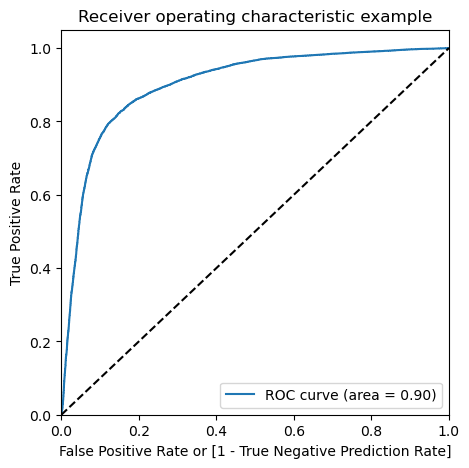

In [104]:
# Plotting the curve for the obtained metrics
draw_roc(y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob)

## Finding Optimal Cutoff Point

In [105]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_sm_pred_final[i]= y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.138574,0,1,1,0,0,0,0,0,0,0,0
1,0,0.401122,0,1,1,1,1,1,0,0,0,0,0
2,0,0.324276,0,1,1,1,1,0,0,0,0,0,0
3,0,0.414619,0,1,1,1,1,1,0,0,0,0,0
4,0,0.508730,1,1,1,1,1,1,1,0,0,0,0


In [106]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0  0.0          0.500000  1.000000     0.000000   
0.1  0.1          0.686696  0.977603     0.395790   
0.2  0.2          0.751996  0.957538     0.546454   
0.3  0.3          0.791321  0.925653     0.656989   
0.4  0.4          0.816881  0.891176     0.742586   
0.5  0.5          0.834042  0.856128     0.811956   
0.6  0.6          0.836116  0.805682     0.866549   
0.7  0.7          0.820795  0.730350     0.911240   
0.8  0.8          0.755003  0.561230     0.948776   
0.9  0.9          0.614294  0.248185     0.980402   


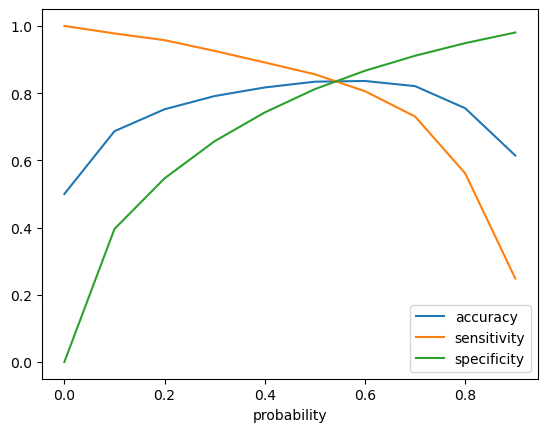

In [107]:
# plotting accuracy sensitivity and specificity for various probabilities calculated above.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

## Initially we selected the optimm point of classification as 0.5.

#### From the above graph, we can see the optimum cutoff is slightly higher than 0.5 but lies lower than 0.6. So lets tweek a little more within this range.

In [108]:
# Let's create columns with refined probability cutoffs 
numbers = [0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59]
for i in numbers:
    y_train_sm_pred_final[i]= y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59
0,0,0.138574,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0.401122,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0.324276,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0.414619,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.508730,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [109]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

      probability  accuracy  sensitivity  specificity
0.50  0.50         0.834042  0.856128     0.811956   
0.51  0.51         0.835001  0.851669     0.818333   
0.52  0.52         0.835675  0.846796     0.824554   
0.53  0.53         0.836038  0.841611     0.830465   
0.54  0.54         0.836245  0.836375     0.836116   
0.55  0.55         0.836064  0.830983     0.841145   
0.56  0.56         0.837075  0.826991     0.847159   
0.57  0.57         0.837179  0.821910     0.852447   
0.58  0.58         0.836219  0.815896     0.856543   
0.59  0.59         0.835831  0.810452     0.861209   


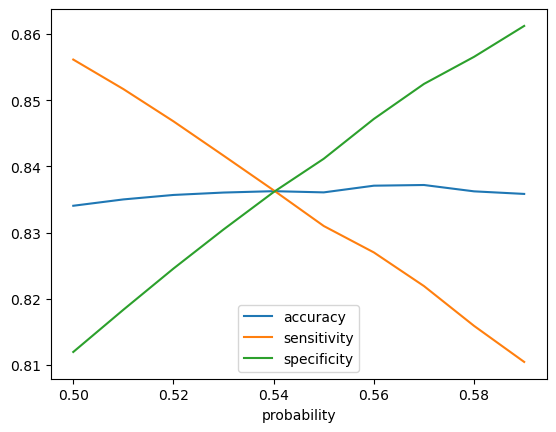

In [110]:
# plotting accuracy sensitivity and specificity for various probabilities calculated above.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

### From the above graph we can conclude, the optimal cutoff point in the probability to define the predicted churn variabe converges at 0.54

In [111]:
#### From the curve above, 0.2 is the optimum point to take it as a cutoff probability.

y_train_sm_pred_final['final_churn_pred'] = y_train_sm_pred_final.Converted_prob.map( lambda x: 1 if x > 0.54 else 0)

y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,final_churn_pred
0,0,0.138574,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0.401122,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0.324276,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0.414619,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.508730,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [112]:
# Calculating the ovearall accuracy again
print("The overall accuracy of the model now is:",metrics.accuracy_score(y_train_sm_pred_final.Converted, y_train_sm_pred_final.final_churn_pred))

The overall accuracy of the model now is: 0.8362453338863542


In [113]:
confusion2 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final.final_churn_pred )
print(confusion2)

[[16127  3161]
 [ 3156 16132]]


In [114]:
TP2 = confusion2[1,1] # true positive 
TN2 = confusion2[0,0] # true negatives
FP2 = confusion2[0,1] # false positives
FN2 = confusion2[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity = ",TP2 / float(TP2+FN2))

# Let us calculate specificity
print("Specificity = ",TN2 / float(TN2+FP2))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP2/ float(TN2+FP2))

# positive predictive value 
print ("Precision = ",TP2 / float(TP2+FP2))

# Negative predictive value
print ("True Negative Prediction Rate = ",TN2 / float(TN2 + FN2))

Sensitivity =  0.8363749481542928
Specificity =  0.8361157196184156
False Positive Rate =  0.1638842803815844
Precision =  0.8361581920903954
True Negative Prediction Rate =  0.8363325208733081


## Precision and recall tradeoff

In [115]:
from sklearn.metrics import precision_recall_curve

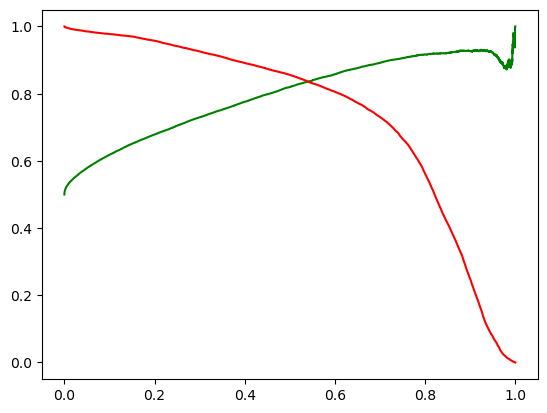

In [116]:
p, r, thresholds = precision_recall_curve(y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob)

# Plotting the curve
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Making predictions on the test set

In [117]:
# Scaling the test data
X_test[num_col] = scaler.transform(X_test[num_col])
X_test.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,overall_rech_amt_6,overall_rech_amt_7,avg_rech_amt_6_7,avg_arpu_6_7,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,tenure_range_6-12 months,tenure_range_1-2 year,tenure_range_2-5 years,tenure_range_5 years and above
35865,0.026143,0.021027,0.000000,0.000070,0.003412,0.000575,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000249,0.000000,0.000000,0.003565,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.001734,0.000000,0.000000,0.001402,0.000000,0.000000,0.0,0.019587,0.000000,0.000054,0.0,0.000000,0.004941,0.000000,0.000000,0.0,0.0,0.017204,0.000489,0.000053,0.001493,0.001937,0.000162,0.003225,0.002280,0.002466,0.000077,0.000000,0.002178,0.003321,0.003182,0.002782,0.000000,0.000041,0.000023,0.001853,0.000000,0.010098,0.0,0.0,0.0,0.001572,0.000036,0.009587,0.0,0.018753,0.000000,0.000053,0.000000,0.000000,0.0,0.000000,0.0,0.016287,0.050725,0.010204,0.022444,0.006234,0.002248,0.004239,0.002494,0.000000,0.000000,0.010932,0.016077,0.000000,0.000000,0.008393,0.041051,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.0,0.02381,0.104167,0.000000,0.000000,0.0000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.002203,0.012662,0.000033,0.059622,0,0,0,1,0,0,1,0,0,0
41952,0.048190,0.005702,0.005250,0.002058,0.011146,0.023873,0.007510,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.006489,0.004028,0.002058,0.000516,0.003132,0.005379,0.000000,0.001285,0.000409,0.000000,0.036826,0.0,0.004151,0.005882,0.003767,0.010557,0.004741,0.018985,0.0,0.010802,0.018971,0.006132,0.0,0.000000,0.020936,0.000000,0.000000,0.0,0.0,0.012674,0.024301,0.009067,0.025150,0.049448,0.023064,0.002868,0.011624,0.005979,0.000000,0.000000,0.000000,0.023235,0.051159,0.022029,0.003628,0.011922,0.005535,0.018785,0.038543,0.004938,0.0,0.0,0.0,0.019560,0.030083,0.008684,0.0,0.000000,0.000000,0.000000,0.006005,0.000000,0.0,0.012541,0.0,0.009772,0.043478,0.020408,0.049875,0.037406,0.032592,0.049875,0.021446,0.011238,0.017544,0.097749,0.093248,0.093248,0.035705,0.002835,0.002872,0.004586,0.001774,0.029730,0.009727,0.00,0.0,0.0,0.02381,0.000000,0.000000,0.071429,0.0625,0.034483,0.0,0.0,0.019572,0.057999,0.000000,0.008444,0.009309,0.004312,0.075152,1,0,0,1,0,0,0,0,1,0
98938,0.061230,

In [118]:
# Feature selection
X_test=X_test[rfe_columns_2]
X_test.head()

,arpu_8,roam_ic_mou_7,roam_og_mou_8,loc_og_t2m_mou_8,std_og_mou_7,total_og_mou_8,loc_ic_mou_6,loc_ic_mou_8,std_ic_mou_8,spl_ic_mou_8,total_rech_num_8,last_day_rch_amt_8,total_rech_data_8,av_rech_amt_data_8,vol_2g_mb_8,monthly_2g_8,aug_vbc_3g,avg_arpu_6_7
35865,0.026143,0.000000,0.000000,0.000000,0.000000,0.000053,0.003321,0.002782,0.009587,0.000000,0.010204,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.059622
41952,0.048190,0.000000,0.000000,0.005379,0.018971,0.009067,0.023235,0.022029,0.008684,0.000000,0.020408,0.011238,0.017544,0.035705,0.004586,0.0,0.019572,0.075152
98938,0.061230,0.000000,0.000000,0.073716,0.000374,0.024987,0.057580,0.183375,0.003706,0.000000,0.035714,0.029220,0.035088,0.124107,0.056568,0.0,0.211621,0.095894
29459,0.042998,0.000000,0.000000,0.000000,0.000000,0.000800,0.001622,0.000037,0.011386,0.000000,0.025510,0.034615,0.052632,0.063039,0.008221,0.2,0.068735,0.070960
70682,0.098384,0.000721,0.031491,0.041749,0.172443,0.157573,0.021147,0.066205,0.002352,0.080257,0.061224,0.029220,0.017544,0.005664,0.000000,0.0,0.000000,0.101081


In [119]:
# Adding constant to the test model.
X_test_SM = sm.add_constant(X_test)

## Predicting the target variable 

In [120]:
y_test_pred = res.predict(X_test_SM)
print("\n The first ten probability value of the prediction are:\n",y_test_pred[:10])


 The first ten probability value of the prediction are:
 35865    0.772260
41952    0.516558
98938    0.000325
29459    0.128443
70682    0.007754
58317    0.237200
4860     0.007990
16890    0.702931
61329    0.652452
94332    0.491091
dtype: float64


In [121]:
y_pred = pd.DataFrame(y_test_pred)
y_pred.head()

,0
35865,0.772260
41952,0.516558
98938,0.000325
29459,0.128443
70682,0.007754


In [122]:
y_pred=y_pred.rename(columns = {0:"Conv_prob"})

In [123]:
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,churn
35865,0
41952,0
98938,0
29459,0
70682,0


In [124]:
y_pred_final = pd.concat([y_test_df,y_pred],axis=1)
y_pred_final.head()

,churn,Conv_prob
35865,0,0.772260
41952,0,0.516558
98938,0,0.000325
29459,0,0.128443
70682,0,0.007754


In [125]:
y_pred_final['test_churn_pred'] = y_pred_final.Conv_prob.map(lambda x: 1 if x>0.54 else 0)
y_pred_final.head()

,churn,Conv_prob,test_churn_pred
35865,0,0.772260,1
41952,0,0.516558,0
98938,0,0.000325,0
29459,0,0.128443,0
70682,0,0.007754,0


In [126]:
# Checking the overall accuracy of the predicted set.
metrics.accuracy_score(y_pred_final.churn, y_pred_final.test_churn_pred)

0.8270192200866571

#### Metrics Evaluation

In [127]:
# Confusion Matrix
confusion2_test = metrics.confusion_matrix(y_pred_final.churn, y_pred_final.test_churn_pred)
print("Confusion Matrix\n",confusion2_test)

Confusion Matrix
 [[6860 1412]
 [ 145  584]]


In [128]:
# Calculating model validation parameters
TP3 = confusion2_test[1,1] # true positive 
TN3 = confusion2_test[0,0] # true negatives
FP3 = confusion2_test[0,1] # false positives
FN3 = confusion2_test[1,0] # false negatives

In [129]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity = ",TP3 / float(TP3+FN3))

# Let us calculate specificity
print("Specificity = ",TN3 / float(TN3+FP3))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP3/ float(TN3+FP3))

# positive predictive value 
print ("Precision = ",TP3 / float(TP3+FP3))

# Negative predictive value
print ("True Negative Prediction Rate = ",TN3 / float(TN3+FN3))

Sensitivity =  0.8010973936899863
Specificity =  0.8293036750483559
False Positive Rate =  0.1706963249516441
Precision =  0.2925851703406814
True Negative Prediction Rate =  0.979300499643112


In [130]:
print("The accuracy of the predicted model is: ",round(metrics.accuracy_score(y_pred_final.churn, y_pred_final.test_churn_pred),2)*100,"%")
print("The sensitivity of the predicted model is: ",round(TP3 / float(TP3+FN3),2)*100,"%")

print("\nAs the model created is based on a sentivity model, i.e. the True positive rate is given more importance as the actual and prediction of churn by a customer\n")

The accuracy of the predicted model is:  83.0 %
The sensitivity of the predicted model is:  80.0 %

As the model created is based on a sentivity model, i.e. the True positive rate is given more importance as the actual and prediction of churn by a customer



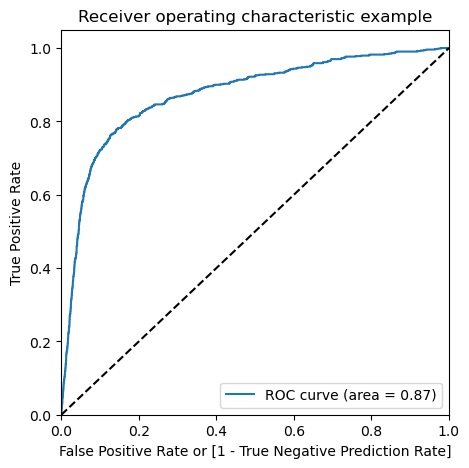

In [131]:
# ROC curve for the test dataset

# Defining the variables to plot the curve
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final.churn,y_pred_final.Conv_prob, drop_intermediate = False )
# Plotting the curve for the obtained metrics
draw_roc(y_pred_final.churn,y_pred_final.Conv_prob)

#### The AUC score for train dataset is 0.90 and the test dataset is 0.87.
#### This model can be considered as a good model.

# Logistic Regression using PCA

In [132]:
# split the dateset into train and test datasets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)
print("Dimension of X_train:", X_train.shape)
print("Dimension of X_test:", X_test.shape)

# apply scaling on the dataset

scaler = MinMaxScaler()
X_train[num_col] = scaler.fit_transform(X_train[num_col])
X_test[num_col] = scaler.transform(X_test[num_col])

# Applying SMOTE technique for data imbalance correction

sm = SMOTE(random_state=42)
X_train_sm,y_train_sm = sm.fit_resample(X_train,y_train)
print("Dimension of X_train_sm Shape:", X_train_sm.shape)
print("Dimension of y_train_sm Shape:", y_train_sm.shape)

X_train_sm.head()

Dimension of X_train: (21000, 126)
Dimension of X_test: (9001, 126)
Dimension of X_train_sm Shape: (38576, 126)
Dimension of y_train_sm Shape: (38576,)


,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,overall_rech_amt_6,overall_rech_amt_7,avg_rech_amt_6_7,avg_arpu_6_7,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,tenure_range_6-12 months,tenure_range_1-2 year,tenure_range_2-5 years,tenure_range_5 years and above
0,0.038904,0.000235,0.000531,0.000238,0.004211,0.003651,0.004095,0.0,0.000000,0.0,0.0,0.00000,0.0,0.000269,0.000585,0.000238,0.007005,0.006330,0.015246,0.003075,0.000000,0.000980,0.000000,0.010426,0.006708,0.003471,0.004240,0.005214,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.006292,0.002472,0.000000,0.0,0.0,0.003461,0.003487,0.004268,0.004415,0.005650,0.012348,0.014898,0.012389,0.018297,0.001078,0.003333,0.000000,0.013386,0.014004,0.024154,0.000000,0.000000,0.000000,0.001320,0.000000,0.000000,0.0,0.00000,0.0,0.001119,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.009772,0.050725,0.015306,0.038404,0.038404,0.034615,0.038404,0.038404,0.034615,0.017544,0.099035,0.099035,0.099035,0.037922,0.003367,0.026477,0.021871,0.000000,0.000000,0.000000,0.25,0.25,0.2,0.000000,0.041667,0.0,0.000000,0.0000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.003420,0.015354,0.002411,0.063393,1,0,0,1,0,0,0,0,0,0
1,0.032921,0.000493,0.000000,0.000000,0.001631,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.0,0.000566,0.000000,0.000000,0.002533,0.000000,0.000000,0.002454,0.000000,0.000000,0.000000,0.000000,0.000000,0.001624,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.001620,0.000000,0.000000,0.013088,0.007020,0.003657,0.041620,0.021697,0.014587,0.013215,0.008694,0.000000,0.040335,0.022862,0.014662,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00209,0.0,0.000000,0.000316,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.055375,0.108696,0.040816,0.009227,0.009227,0.008316,0.009227,0.005985,0.005619,0.105263,0.016077,0.016077,0.016077,0.034967,0.064367,0.045634,0.035909,0.000332,0.000000,0.000000,0.00,0.00,0.0,0.166667,0.083333,0.0,0.000000,0.0000,0.0,0.057143,0.0,0.000000,0.000000,0.0,0.009431,0.020687,0.010484,0.068877,1,0,0,1,0,0,0,0,1,0
2,0.033826,0.000876,0.000275,0.000714,0.003

In [133]:
# importing PCA
from sklearn.decomposition import PCA
pca = PCA(random_state=42)

# applying PCA on train data
pca.fit(X_train_sm)

PCA(random_state=42)

In [134]:
X_train_sm_pca=pca.fit_transform(X_train_sm)
print("Dimension of X_train_sm_pca: ",X_train_sm_pca.shape)

X_test_pca=pca.transform(X_test)
print("Dimension of X_test_pca: ",X_test_pca.shape)

Dimension of X_train_sm_pca:  (38576, 126)
Dimension of X_test_pca:  (9001, 126)


In [135]:
#Viewing the PCA components
pca.components_

array([[ 1.77080250e-02,  5.62945551e-03,  1.28071557e-02, ...,
        -8.33377373e-02,  2.03169293e-01, -2.25884463e-04],
       [ 1.17884332e-03,  1.36226801e-04,  2.66567649e-03, ...,
         6.62002105e-01, -7.17541378e-01,  1.93966990e-04],
       [ 8.31908962e-03, -2.32698646e-02, -1.53378013e-02, ...,
         7.54642802e-02,  5.50287343e-02,  1.26734621e-03],
       ...,
       [-3.94307290e-07,  1.32661563e-06, -2.21287988e-06, ...,
        -3.76725866e-08, -1.42403279e-08,  2.74517957e-08],
       [ 2.29473384e-07, -1.88640723e-06,  1.53383133e-06, ...,
        -3.64244933e-08, -2.71775061e-08, -3.24942343e-08],
       [-0.00000000e+00, -1.20429354e-16, -2.26455538e-17, ...,
         3.32681843e-18, -2.16312073e-18, -2.01305223e-17]])

### Performing Logistic Regression

In [136]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg_pca = LogisticRegression()
logreg_pca.fit(X_train_sm_pca, y_train_sm)

# making the predictions
y_pred = logreg_pca.predict(X_test_pca)

# converting the prediction into a dataframe
y_pred_df = pd.DataFrame(y_pred)
print("Dimension of y_pred_df:", y_pred_df.shape)

Dimension of y_pred_df: (9001, 1)


In [137]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Checking the Confusion matrix
print("Confusion Matirx for y_test & y_pred\n",confusion_matrix(y_test,y_pred),"\n")

# Checking the Accuracy of the Predicted model.
print("Accuracy of the logistic regression model with PCA: ",accuracy_score(y_test,y_pred))

Confusion Matirx for y_test & y_pred
 [[6761 1511]
 [ 126  603]] 

Accuracy of the logistic regression model with PCA:  0.818131318742362


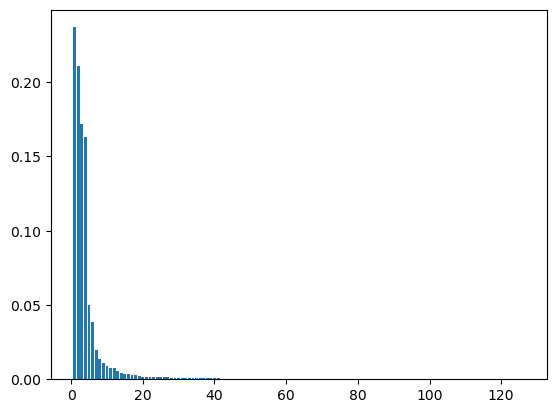

In [138]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1),pca.explained_variance_ratio_)
plt.show()

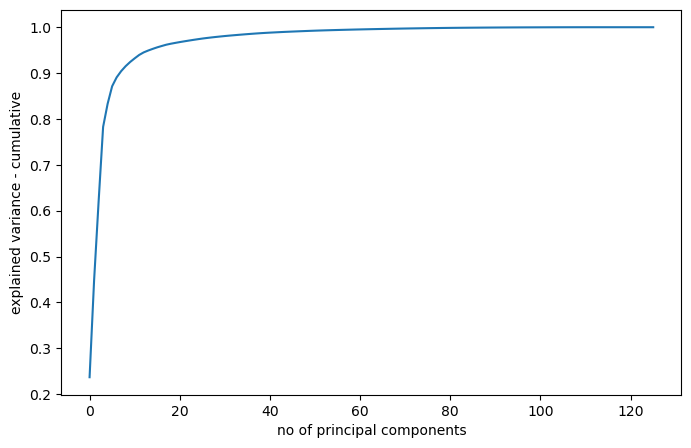

In [140]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

# Making a scree plot
fig = plt.figure(figsize=[8,5])
plt.plot(var_cumu)
plt.xlabel('no of principal components')
plt.ylabel('explained variance - cumulative')
plt.show()

In [141]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)

array([23.7, 44.8, 62. , 78.3, 83.3, 87.1, 89. , 90.4, 91.5, 92.4, 93.2,
       93.9, 94.5, 94.9, 95.3, 95.6, 95.9, 96.2, 96.4, 96.6, 96.8, 97. ,
       97.2, 97.4, 97.5, 97.6, 97.7, 97.8, 97.9, 98. , 98.1, 98.2, 98.3,
       98.4, 98.5, 98.6, 98.7, 98.8, 98.9, 99. , 99.1, 99.2, 99.3, 99.3,
       99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3,
       99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3,
       99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3,
       99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3,
       99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3,
       99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3,
       99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3,
       99.3, 99.3, 99.3, 99.3, 99.3])

### 90% of the data can be explained with 8 PCA components

### Fitting the dataset with the 8 explainable components

In [142]:
pca_8 = PCA(n_components=15)

train_pca_8 = pca_8.fit_transform(X_train_sm)
print("Dimension for Train dataset using PCA: ", train_pca_8.shape)

test_pca_8 = pca_8.transform(X_test)
print("Dimension for Test dataset using PCA: ", test_pca_8.shape)

Dimension for Train dataset using PCA:  (38576, 15)
Dimension for Test dataset using PCA:  (9001, 15)


In [143]:
logreg_pca_8 = LogisticRegression()
logreg_pca_8.fit(train_pca_8, y_train_sm)

# making the predictions
y_pred_8 = logreg_pca_8.predict(test_pca_8)

# converting the prediction into a dataframe
y_pred_df_8 = pd.DataFrame(y_pred_8)
print("Dimension of y_pred_df_8: ", y_pred_df_8.shape)

Dimension of y_pred_df_8:  (9001, 1)


In [144]:
# Checking the Confusion matrix
print("Confusion Matirx for y_test & y_pred\n",confusion_matrix(y_test,y_pred_8),"\n")

# Checking the Accuracy of the Predicted model.
print("Accuracy of the logistic regression model with PCA: ",accuracy_score(y_test,y_pred_8))

Confusion Matirx for y_test & y_pred
 [[6249 2023]
 [ 185  544]] 

Accuracy of the logistic regression model with PCA:  0.7546939228974558


### Final conclusion with no PCA
#### We can see that the logistic model with no PCA has good sensitivity and accuracy, which are comparable to the models with PCA. So, we can go for the more simplistic model such as logistic regression with PCA as it expliains the important predictor variables as well as the significance of each variable. The model also hels us to identify the variables which should be act upon for making the decision of the to be churned customers. Hence, the model is more relevant in terms of explaining to the business.

## BUSINESS RECOMMENDATIONS 

#### Target the customers, whose minutes of usage of the incoming local calls and outgoing ISD calls are less in the action phase (mostly in the month of August).
#### Target the customers, whose outgoing others charge in July and incoming others on August are less.
#### Also, the customers having value based cost in the action phase increased are more likely to churn than the other customers. Hence, these customers may be a good target to provide offer.
#### Cutomers, whose monthly 3G recharge in August is more, are likely to be churned.
#### Customers having decreasing STD incoming minutes of usage for operators T to fixed lines of T for the month of August are more likely to churn.
#### Cutomers decreasing monthly 2g usage for August are most probable to churn.
#### Customers having decreasing incoming minutes of usage for operators T to fixed lines of T for August are more likely to churn.
#### roam_og_mou_8 variables have positive coefficients (0.7135). That means for the customers, whose roaming outgoing minutes of usage is increasing are more likely to churn.